## Data overview, dependencies exploration and top universities comparison
### ARWU (Shanghai) data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import requests
import sys
import json
import time

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode()

First of all let's open the data and see its structure

<a href="http://www.shanghairanking.com/ARWU-Methodology-2015.html">ARWU Methodology</a>
<table>
    <tr>
        <th>Criteria </th>
        <th>Indicator</th>
        <th>Code</th>
        <th>Weight</th>
    </tr>
    <tr>
        <td>Quality of Education</td>
        <td>Alumni of an institution winning Nobel Prizes and Fields Medals</td>
        <td>Alumni</td>
        <td>10%</td>
    </tr>
    <tr>
        <td rowspan="2">Quality of Faculty</td>
        <td>Staff of an institution winning Nobel Prizes and Fields Medals</td>
        <td>Award</td>
        <td>20%</td>
    </tr>
    <tr>
        <td>Highly cited researchers in 21 broad subject categories</td>
        <td>HiCi</td>
        <td>20%</td>
    </tr>
    <tr>
        <td rowspan="2">Research Output</td>
        <td>Papers published in Nature and Science*</td>
        <td>N&amp;S</td>
        <td>20%</td>
    </tr>
    <tr>
        <td>Papers indexed in Science Citation Index-expanded and Social Science Citation Index</td>
        <td>PUB</td>
        <td>20%</td>
    </tr>
    <tr>
        <td>Per Capita Performance</td>
        <td>Per capita academic performance of an institution</td>
        <td>PCP</td>
        <td>10%</td>
    </tr>
    <tr>
    <td>Total</td>
        <td></td>
        <td></td>
        <td>100%</td>
    </tr>
    <tr>
        <td colspan="5">* For institutions specialized in humanities and social sciences such as London School of Economics, N&amp;S is not considered, and the weight of N&amp;S is relocated to other indicators.</td>
    </tr>
</table>

In [4]:
data = pd.read_csv('data/shanghaiData.csv', skiprows=[3897]) # empty line

Of course, watch my university =)

In [5]:
data.iloc[np.where([data['university_name'] == 'Moscow State University'])[1]]

world_rank          university_name national_rank  total_score  alumni  \
67           67  Moscow State University             1         28.4    51.4   
570          70  Moscow State University             1         27.9    49.5   
1075         76  Moscow State University             1         27.1    51.6   
1579         70  Moscow State University             1         28.1    49.1   
2089         77  Moscow State University             1         26.9    47.9   
2587         74  Moscow State University             1         27.9    46.8   
3090         77  Moscow State University             1         26.9    47.4   
3593         80  Moscow State University             1         26.3    43.7   
3877         79  Moscow State University           1.0         26.1    43.1   
3979         84  Moscow State University             1         26.1    42.4   
4481         86  Moscow State University             1         25.3    41.4   

      award  hici    ns   pub   pcp  year  
67     34.9   0.0   7.5  54.0  31.6  2005  
570    34.2   0.0   5.6  54.3  33.4  2006  
1075   34.2   0.0   7.5  48.5  31.6  2007  
1579   34.2   0.0   8.3  53.2  33.4  2008  
2089   34.2   0.0   8.2  48.7  31.7  2009  
2587   34.1   0.0   9.6  52.4  31.2  2010  
3090   34.1   0.0  10.1  46.9  31.2  2011  
3593   34.1   0.0   9.1  48.1  29.0  2012  
3877   33.3   0.0   8.8  48.1  30.5  2013  
3979   33.0   0.0   9.7  47.9  30.7  2014  
4481   33.0   0.0   7.7  46.4  31.3  2015

There are no total scores for universities that are below top200, so let us count it using ARWU methodology (watch above)

In [6]:
data['total_score_re'] = data.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9], axis=1)

Correlation between new and old scores are almost 1, so we can drop old scores and add new scores

In [7]:
data[['total_score', 'total_score_re']].corr()

total_score  total_score_re
total_score        1.000000        0.999979
total_score_re     0.999979        1.000000

In [8]:
data.drop('total_score', 1, inplace=True)
data.rename(columns={'total_score_re': 'total_score'}, inplace=True)

In [9]:
data[:10]

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   
5          6           California Institute of Technology             5   
6          7                          Columbia University             6   
7          8                         Princeton University             7   
8          9                        University of Chicago             8   
9         10                         University of Oxford             2   

   alumni  award   hici     ns    pub    pcp  year  total_score  
0   100.0  100.0  100.0  100.0  100.0   72.4  2005        97.24  
1    99.8   93.4   53.3   56.6   70.9   66.9  2005        71.51  
2    41.1   72.2   88.5   70.9   72.3   65.0  2005        71.39  
3    71.8   76.0   69.4   73.9   72.2   52.7  2005        70.75  
4    74.0   80.6   66.7   65.8   64.3   53.0  2005        68.18  
5    59.2   68.6   59.8   65.8   52.5  100.0  2005        65.26  
6    79.4   60.6   56.1   54.2   69.5   45.4  2005        60.56  
7    63.4   76.8   60.9   48.7   48.5   59.1  2005        59.23  
8    75.6   81.9   50.3   44.7   56.4   42.2  2005        58.44  
9    64.3   59.1   48.4   55.6   68.4   53.2  2005        58.05

## Data visualization

Now I want to visualize data on the map, so I need coordinates of universities. I've done it by GeoNames web service

In [10]:
GEO_USER_NAME = "ospanoff"

def get_geo_by_university_name(uname, entries=2, retries=3):
    """
    This function gets geographic coordinates, country name
    and country code from GeoNames.
    """
    keys = {'q': uname, 'maxRows': entries, 'username': GEO_USER_NAME}
    
    for i in range(retries):
        r = requests.get('http://api.geonames.org/searchJSON', params=keys).json()['geonames']
        for a in r:
            if 'countryName' in a:
                return {
                    'countryName': a['countryName'],
                    'countryCode': a['countryCode'],
                    'lat': a['lat'],
                    'lng': a['lng'],
                    'university': uname
                }

        r = requests.get('http://api.geonames.org/wikipediaSearchJSON?', params=keys).json()['geonames']
        for a in r:
            keys_ll = {'lat': a['lat'], 'lng': a['lng'], 'username': GEO_USER_NAME}
            r0 = requests.get('http://api.geonames.org/countrySubdivisionJSON', params=keys_ll).json()
            if 'countryName' in r0:
                return {
                    'countryName': r0['countryName'],
                    'countryCode': r0['countryCode'],
                    'lat': a['lat'],
                    'lng': a['lng'],
                    'university': uname
                }
        
        time.sleep(0.1)
    
    return {
        'countryName': '',
        'countryCode': '',
        'lat': 0,
        'lng': 0,
        'university': uname
    }

In [11]:
universities = np.sort(list(set(data['university_name'])))

In [12]:
# %%time
# geos = dict()
# for i, un in enumerate(universities):
#     sys.stdout.write('\r{:.2f}%'.format((i + 1) / universities.size * 100))
#     geos[un] = get_geo_by_university_name(un)

# json.dump(geos, open('data/university_locs.json', 'w'))

In [13]:
# geos = json.load(open('data/university_locs.json'))

In [14]:
s = '{"Aix-Marseille University": {"lng": "5.38261", "lat": "43.29817", "university": "Aix-Marseille University", "countryCode": "FR", "countryName": "France"}, "Auburn University": {"lng": "-85.48495", "lat": "32.60208", "university": "Auburn University", "countryCode": "US", "countryName": "United States"}, "Indiana University Bloomington": {"lng": "-86.5377", "lat": "39.186", "university": "Indiana University Bloomington", "countryCode": "US", "countryName": "United States"}, "University of Seville": {"lng": "-5.99051", "lat": "37.3808", "university": "University of Seville", "countryCode": "ES", "countryName": "Spain"}, "Karolinska Institute": {"lng": 18.026666666666667, "lat": 59.348888888888894, "university": "Karolinska Institute", "countryCode": "SE", "countryName": "Sweden"}, "University of Belgrade": {"lng": 20.46222222222222, "lat": 44.82055555555556, "university": "University of Belgrade", "countryCode": "RS", "countryName": "Serbia"}, "Swansea Univ": {"lng": "-3.97834", "lat": "51.60874", "university": "Swansea Univ", "countryCode": "GB", "countryName": "United Kingdom"}, "The University of Newcastle, Australia": {"lng": "151.6846", "lat": "-32.8818", "university": "The University of Newcastle, Australia", "countryCode": "AU", "countryName": "Australia"}, "KTH Royal Institute of Technology": {"lng": 18.072778, "lat": 59.347222, "university": "KTH Royal Institute of Technology", "countryCode": "SE", "countryName": "Sweden"}, "Queen Mary University of London": {"lng": -1.5619305555555556, "lat": 52.38008055555556, "university": "Queen Mary University of London", "countryCode": "GB", "countryName": "United Kingdom"}, "Queen Mary, University of London": {"lng": -1.5619305555555556, "lat": 52.38008055555556, "university": "Queen Mary, University of London", "countryCode": "GB", "countryName": "United Kingdom"}, "Old Dominion University": {"lng": "-76.30461", "lat": "36.89005", "university": "Old Dominion University", "countryCode": "US", "countryName": "United States"}, "Sungkyunkwan University": {"lng": 126.99416666666667, "lat": 37.58722222222222, "university": "Sungkyunkwan University", "countryCode": "KR", "countryName": "South Korea"}, "University of Miami": {"lng": "-80.36755", "lat": "25.74649", "university": "University of Miami", "countryCode": "US", "countryName": "United States"}, "University of Copenhagen": {"lng": "12.57329", "lat": "55.68743", "university": "University of Copenhagen", "countryCode": "DK", "countryName": "Denmark"}, "Peking Union Medical College": {"lng": 116.32666666666667, "lat": 40.000277777777775, "university": "Peking Union Medical College", "countryCode": "CN", "countryName": "China"}, "Medical College of Wisconsin": {"lng": "-88.02208", "lat": "43.04367", "university": "Medical College of Wisconsin", "countryCode": "US", "countryName": "United States"}, "University of Tuebingen": {"lng": 9.059166666666668, "lat": 48.52463888888889, "university": "University of Tuebingen", "countryCode": "DE", "countryName": "Germany"}, "Case Western Reserve University": {"lng": "-81.59707", "lat": "41.5045", "university": "Case Western Reserve University", "countryCode": "US", "countryName": "United States"}, "University of Cincinnati": {"lng": "-84.51633", "lat": "39.13145", "university": "University of Cincinnati", "countryCode": "US", "countryName": "United States"}, "Texas A&M University - College Station": {"lng": -96.344056, "lat": 30.610369, "university": "Texas A&M University - College Station", "countryCode": "US", "countryName": "United States"}, "University of Padua": {"lng": "11.86667", "lat": "45.41667", "university": "University of Padua", "countryCode": "IT", "countryName": "Italy"}, "University of Tsukuba": {"lng": 140.28305555555556, "lat": 36.23305555555556, "university": "University of Tsukuba", "countryCode": "JP", "countryName": "Japan"}, "Utah State University": {"lng": "-111.84855", "lat": "40.76495", "university": "Utah State University", "countryCode": "US", "countryName": "United States"}, "University of Colorado Health Science Center": {"lng": -104.83772222222221, "lat": 39.74510277777778, "university": "University of Colorado Health Science Center", "countryCode": "US", "countryName": "United States"}, "Michigan State University": {"lng": "-83.73605", "lat": "42.27587", "university": "Michigan State University", "countryCode": "US", "countryName": "United States"}, "University of Warwick": {"lng": "-1.562", "lat": "52.381", "university": "University of Warwick", "countryCode": "GB", "countryName": "United Kingdom"}, "Arizona State University - Tempe": {"lng": "-111.93355", "lat": "33.41983", "university": "Arizona State University - Tempe", "countryCode": "US", "countryName": "United States"}, "UNESP": {"lng": "-50.43779", "lat": "-22.64735", "university": "UNESP", "countryCode": "BR", "countryName": "Brazil"}, "University of Eastern Finland": {"lng": 22.272222222222222, "lat": 60.45277777777778, "university": "University of Eastern Finland", "countryCode": "FI", "countryName": "Finland"}, "Texas Tech University": {"lng": "-101.88795", "lat": "33.59231", "university": "Texas Tech University", "countryCode": "US", "countryName": "United States"}, "University of Barcelona": {"lng": "2.11051", "lat": "41.39367", "university": "University of Barcelona", "countryCode": "ES", "countryName": "Spain"}, "The University of Dundee": {"lng": -2.9702, "lat": 56.46416, "university": "The University of Dundee", "countryCode": "GB", "countryName": "United Kingdom"}, "Technical University Munich": {"lng": "11.56729", "lat": "48.14912", "university": "Technical University Munich", "countryCode": "DE", "countryName": "Germany"}, "Tokyo University of Science": {"lng": 139.762222, "lat": 35.713333, "university": "Tokyo University of Science", "countryCode": "JP", "countryName": "Japan"}, "Queen Mary, U. of London": {"lng": -0.748238, "lat": 51.628661, "university": "Queen Mary, U. of London", "countryCode": "GB", "countryName": "United Kingdom"}, "Pompeu Fabra University": {"lng": 2.1762504999999996, "lat": 41.3786501, "university": "Pompeu Fabra University", "countryCode": "ES", "countryName": "Spain"}, "University of California, Santa Cruz": {"lng": "-122.05274", "lat": "36.99745", "university": "University of California, Santa Cruz", "countryCode": "US", "countryName": "United States"}, "Wake Forest University": {"lng": "-80.27727", "lat": "36.13347", "university": "Wake Forest University", "countryCode": "US", "countryName": "United States"}, "University of Missouri - Columbia": {"lng": "-92.32768", "lat": "38.94587", "university": "University of Missouri - Columbia", "countryCode": "US", "countryName": "United States"}, "The University of New South Wales": {"lng": "151.6346", "lat": "-30.4818", "university": "The University of New South Wales", "countryCode": "AU", "countryName": "Australia"}, "Aix Marseille University": {"lng": "5.38261", "lat": "43.29817", "university": "Aix Marseille University", "countryCode": "FR", "countryName": "France"}, "Victoria University of Wellington": {"lng": "174.76837", "lat": "-41.29037", "university": "Victoria University of Wellington", "countryCode": "NZ", "countryName": "New Zealand"}, "University of California, Los Angeles": {"lng": "-118.28563", "lat": "34.02051", "university": "University of California, Los Angeles", "countryCode": "US", "countryName": "United States"}, "London School of Economics and Political Science": {"lng": "-0.11645", "lat": "51.51398", "university": "London School of Economics and Political Science", "countryCode": "GB", "countryName": "United Kingdom"}, "The Open University": {"lng": "74.3648", "lat": "31.5176", "university": "The Open University", "countryCode": "PK", "countryName": "Pakistan"}, "The University of Queensland": {"lng": 11.96888888888889, "lat": 51.48638888888889, "university": "The University of Queensland", "countryCode": "DE", "countryName": "Germany"}, "Lehigh University": {"lng": "-75.38018", "lat": "40.60649", "university": "Lehigh University", "countryCode": "US", "countryName": "United States"}, "King\'s College London": {"lng": 0.3976, "lat": 52.7543, "university": "King\'s College London", "countryCode": "GB", "countryName": "United Kingdom"}, "Curtin University": {"lng": "115.8942", "lat": "-32.00417", "university": "Curtin University", "countryCode": "AU", "countryName": "Australia"}, "University of Naples Federico II": {"lng": "14.25762", "lat": "40.84554", "university": "University of Naples Federico II", "countryCode": "IT", "countryName": "Italy"}, "University of Erlangen-Nuremberg": {"lng": 11.0069, "lat": 49.5972, "university": "University of Erlangen-Nuremberg", "countryCode": "DE", "countryName": "Germany"}, "Hanyang University": {"lng": 127.04444444444444, "lat": 37.55638888888888, "university": "Hanyang University", "countryCode": "KR", "countryName": "South Korea"}, "University of California, San Diego": {"lng": "-117.20392", "lat": "32.85477", "university": "University of California, San Diego", "countryCode": "US", "countryName": "United States"}, "Polytechnic University of Catalonia": {"lng": 1.693611, "lat": 41.229722, "university": "Polytechnic University of Catalonia", "countryCode": "ES", "countryName": "Spain"}, "University of Bonn": {"lng": 7.10222222, "lat": 50.73388889, "university": "University of Bonn", "countryCode": "DE", "countryName": "Germany"}, "The University of Melbourne": {"lng": -2.23361111, "lat": 53.46555556, "university": "The University of Melbourne", "countryCode": "GB", "countryName": "United Kingdom"}, "The University of Texas Health Science Center at San Antonio": {"lng": -101.87999, "lat": 33.58483, "university": "The University of Texas Health Science Center at San Antonio", "countryCode": "US", "countryName": "United States"}, "The Imperial College of Science, Technology and Medicine": {"lng": 139.762222, "lat": 35.713333, "university": "The Imperial College of Science, Technology and Medicine", "countryCode": "JP", "countryName": "Japan"}, "University of Groningen": {"lng": "6.57197", "lat": "53.22397", "university": "University of Groningen", "countryCode": "NL", "countryName": "Netherlands"}, "University of Strathclyde": {"lng": "-4.24262", "lat": "55.86219", "university": "University of Strathclyde", "countryCode": "GB", "countryName": "United Kingdom"}, "Joseph Fourier University (Grenoble 1)": {"lng": 5.726944444444444, "lat": 45.187777777777775, "university": "Joseph Fourier University (Grenoble 1)", "countryCode": "FR", "countryName": "France"}, "Florida State University": {"lng": "-82.43902", "lat": "28.07389", "university": "Florida State University", "countryCode": "US", "countryName": "United States"}, "Kanazawa University": {"lng": 136.6227777777778, "lat": 36.59444444444445, "university": "Kanazawa University", "countryCode": "JP", "countryName": "Japan"}, "Rice University": {"lng": "-95.39744", "lat": "29.71912", "university": "Rice University", "countryCode": "US", "countryName": "United States"}, "University of Leeds": {"lng": "-1.51908", "lat": "53.8073", "university": "University of Leeds", "countryCode": "GB", "countryName": "United Kingdom"}, "TU Dresden": {"lng": 13.7267, "lat": 51.0281, "university": "TU Dresden", "countryCode": "DE", "countryName": "Germany"}, "The Hong Kong Polytechnic University": {"lng": 114.17949, "lat": 22.30444, "university": "The Hong Kong Polytechnic University", "countryCode": "HK", "countryName": "Hong Kong"}, "University of Florida": {"lng": "-82.43902", "lat": "28.07389", "university": "University of Florida", "countryCode": "US", "countryName": "United States"}, "Brunel University": {"lng": "-0.47283", "lat": "51.53285", "university": "Brunel University", "countryCode": "GB", "countryName": "United Kingdom"}, "Chalmers University of Technology": {"lng": "11.97394", "lat": "57.68945", "university": "Chalmers University of Technology", "countryCode": "SE", "countryName": "Sweden"}, "University of Bern": {"lng": 7.438108333333334, "lat": 46.950519444444446, "university": "University of Bern", "countryCode": "CH", "countryName": "Switzerland"}, "University of Innsbruck": {"lng": 11.383333, "lat": 47.266667, "university": "University of Innsbruck", "countryCode": "AT", "countryName": "Austria"}, "Massey University": {"lng": "175.62021", "lat": "-40.37825", "university": "Massey University", "countryCode": "NZ", "countryName": "New Zealand"}, "Soochow University": {"lng": "121.5449", "lat": "25.09377", "university": "Soochow University", "countryCode": "TW", "countryName": "Taiwan"}, "Stockholm University": {"lng": "18.03297", "lat": "59.35223", "university": "Stockholm University", "countryCode": "SE", "countryName": "Sweden"}, "China Agricultural University": {"lng": "120.35569", "lat": "36.11049", "university": "China Agricultural University", "countryCode": "CN", "countryName": "China"}, "Paul Sabatier University (Toulouse 3)": {"lng": 1.443889, "lat": 43.604444, "university": "Paul Sabatier University (Toulouse 3)", "countryCode": "FR", "countryName": "France"}, "The University of Akron": {"lng": -81.517778, "lat": 41.073056, "university": "The University of Akron", "countryCode": "US", "countryName": "United States"}, "University of Munich": {"lng": "11.56729", "lat": "48.14912", "university": "University of Munich", "countryCode": "DE", "countryName": "Germany"}, "Utrecht University": {"lng": "5.12233", "lat": "52.09021", "university": "Utrecht University", "countryCode": "NL", "countryName": "Netherlands"}, "Peking University": {"lng": "116.36854", "lat": "39.95983", "university": "Peking University", "countryCode": "CN", "countryName": "China"}, "Fudan University": {"lng": "121.5033", "lat": "31.30077", "university": "Fudan University", "countryCode": "CN", "countryName": "China"}, "University of Waterloo": {"lng": -80.54, "lat": 43.468889, "university": "University of Waterloo", "countryCode": "CA", "countryName": "Canada"}, "The Johns Hopkins University": {"lng": "-77.03692", "lat": "38.91289", "university": "The Johns Hopkins University", "countryCode": "US", "countryName": "United States"}, "Medical University of Innsbruck": {"lng": 11.3839, "lat": 47.2631, "university": "Medical University of Innsbruck", "countryCode": "AT", "countryName": "Austria"}, "University of Michigan-Ann Arbor": {"lng": "-83.73605", "lat": "42.27587", "university": "University of Michigan-Ann Arbor", "countryCode": "US", "countryName": "United States"}, "Tokyo University of Agriculture and Technology": {"lng": "139.51811", "lat": "35.69885", "university": "Tokyo University of Agriculture and Technology", "countryCode": "JP", "countryName": "Japan"}, "Tohoku University": {"lng": 140.96638888888887, "lat": 38.35, "university": "Tohoku University", "countryCode": "JP", "countryName": "Japan"}, "Ewha Womans University": {"lng": 126.946833, "lat": 37.561867, "university": "Ewha Womans University", "countryCode": "KR", "countryName": "South Korea"}, "Polytechnic University of Valencia": {"lng": -0.343808, "lat": 39.4817, "university": "Polytechnic University of Valencia", "countryCode": "ES", "countryName": "Spain"}, "University of Provence (Aix-Marseille 1)": {"lng": 5.357777777777778, "lat": 43.29361111111111, "university": "University of Provence (Aix-Marseille 1)", "countryCode": "FR", "countryName": "France"}, "University of Turin": {"lng": "7.65833", "lat": "45.06455", "university": "University of Turin", "countryCode": "IT", "countryName": "Italy"}, "University of Utah": {"lng": "-111.84855", "lat": "40.76495", "university": "University of Utah", "countryCode": "US", "countryName": "United States"}, "The University of Adelaide": {"lng": 138.574722, "lat": -35.018333, "university": "The University of Adelaide", "countryCode": "AU", "countryName": "Australia"}, "University of Trieste": {"lng": "13.79342", "lat": "45.65869", "university": "University of Trieste", "countryCode": "IT", "countryName": "Italy"}, "Jagiellonian University": {"lng": 19.932778, "lat": 50.060833, "university": "Jagiellonian University", "countryCode": "PL", "countryName": "Poland"}, "Nanjing Medical University": {"lng": 116.305278, "lat": 39.989722, "university": "Nanjing Medical University", "countryCode": "CN", "countryName": "China"}, "Catholic University of the Sacred Heart": {"lng": 2.343, "lat": 48.886694444444444, "university": "Catholic University of the Sacred Heart", "countryCode": "FR", "countryName": "France"}, "Yeshiva University": {"lng": "-73.92847", "lat": "40.85204", "university": "Yeshiva University", "countryCode": "US", "countryName": "United States"}, "Laval University": {"lng": -71.274722, "lat": 46.78, "university": "Laval University", "countryCode": "CA", "countryName": "Canada"}, "Polytechnic Institute of Milan": {"lng": 9.22732, "lat": 45.47803, "university": "Polytechnic Institute of Milan", "countryCode": "IT", "countryName": "Italy"}, "The University of Montana - Missoula": {"lng": "-114.01205", "lat": "46.8477", "university": "The University of Montana - Missoula", "countryCode": "US", "countryName": "United States"}, "Kyushu University": {"lng": 131, "lat": 33, "university": "Kyushu University", "countryCode": "JP", "countryName": "Japan"}, "Medical University of Graz": {"lng": 15.43888888888889, "lat": 47.07027777777778, "university": "Medical University of Graz", "countryCode": "AT", "countryName": "Austria"}, "Autonomous University of Barcelona": {"lng": -3.36412, "lat": 40.4816, "university": "Autonomous University of Barcelona", "countryCode": "ES", "countryName": "Spain"}, "University of Duesseldorf": {"lng": "6.79417", "lat": "51.1903", "university": "University of Duesseldorf", "countryCode": "DE", "countryName": "Germany"}, "Dalian University of Technology": {"lng": 7.414267, "lat": 51.492461, "university": "Dalian University of Technology", "countryCode": "DE", "countryName": "Germany"}, "Nagoya University": {"lng": 136.9063888888889, "lat": 35.18111111111111, "university": "Nagoya University", "countryCode": "JP", "countryName": "Japan"}, "New Mexico State University": {"lng": "-106.75334", "lat": "32.28343", "university": "New Mexico State University", "countryCode": "US", "countryName": "United States"}, "University of Zaragoza": {"lng": "-0.88738", "lat": "41.68331", "university": "University of Zaragoza", "countryCode": "ES", "countryName": "Spain"}, "Saint Louis University": {"lng": "-90.30928", "lat": "38.65588", "university": "Saint Louis University", "countryCode": "US", "countryName": "United States"}, "Uppsala University": {"lng": "17.63149", "lat": "59.85519", "university": "Uppsala University", "countryCode": "SE", "countryName": "Sweden"}, "University of Nice Sophia Antipolis": {"lng": 7.055, "lat": 43.6155, "university": "University of Nice Sophia Antipolis", "countryCode": "FR", "countryName": "France"}, "University of Cape Town": {"lng": "18.46082", "lat": "-33.95796", "university": "University of Cape Town", "countryCode": "ZA", "countryName": "South Africa"}, "University of Kansas - Lawrence": {"lng": "-95.25451", "lat": "38.95381", "university": "University of Kansas - Lawrence", "countryCode": "US", "countryName": "United States"}, "Swiss Federal Institute of Technology of Lausanne": {"lng": 6.57944, "lat": 46.5225, "university": "Swiss Federal Institute of Technology of Lausanne", "countryCode": "CH", "countryName": "Switzerland"}, "The University of Texas Medical Branch at Galveston": {"lng": -94.82583333333334, "lat": 29.28111111111111, "university": "The University of Texas Medical Branch at Galveston", "countryCode": "US", "countryName": "United States"}, "New York University": {"lng": "-73.96125", "lat": "40.80899", "university": "New York University", "countryCode": "US", "countryName": "United States"}, "University of Wisconsin - Madison": {"lng": "-89.41095", "lat": "43.07388", "university": "University of Wisconsin - Madison", "countryCode": "US", "countryName": "United States"}, "University of Chicago": {"lng": "-87.59977", "lat": "41.78976", "university": "University of Chicago", "countryCode": "US", "countryName": "United States"}, "University of Pisa": {"lng": 11.96888888888889, "lat": 51.48638888888889, "university": "University of Pisa", "countryCode": "DE", "countryName": "Germany"}, "University of California, Davis": {"lng": "-121.74913", "lat": "38.54018", "university": "University of California, Davis", "countryCode": "US", "countryName": "United States"}, "University of Iowa": {"lng": "-91.53581", "lat": "41.66387", "university": "University of Iowa", "countryCode": "US", "countryName": "United States"}, "University of Washington": {"lng": "-122.5504", "lat": "47.23565", "university": "University of Washington", "countryCode": "US", "countryName": "United States"}, "Shanghai Jiao Tong University": {"lng": 121.42972222, "lat": 31.20083333, "university": "Shanghai Jiao Tong University", "countryCode": "CN", "countryName": "China"}, "University of Roma - Tor Vergata": {"lng": -58.509861111111114, "lat": -34.593500000000006, "university": "University of Roma - Tor Vergata", "countryCode": "AR", "countryName": "Argentina"}, "Radboud University Nijmegen": {"lng": 5.866667, "lat": 51.833333, "university": "Radboud University Nijmegen", "countryCode": "NL", "countryName": "Netherlands"}, "Ecole Normale Superieure - Paris": {"lng": "2.34492", "lat": "48.84194", "university": "Ecole Normale Superieure - Paris", "countryCode": "FR", "countryName": "France"}, "Durham University": {"lng": "-78.94001", "lat": "36.00153", "university": "Durham University", "countryCode": "US", "countryName": "United States"}, "University of Sherbrooke": {"lng": -71.88842500000001, "lat": 45.40125833333333, "university": "University of Sherbrooke", "countryCode": "CA", "countryName": "Canada"}, "University of Santiago Compostela": {"lng": -8.546303, "lat": 42.880447, "university": "University of Santiago Compostela", "countryCode": "ES", "countryName": "Spain"}, "Dartmouth College": {"lng": "-72.28641", "lat": "43.70035", "university": "Dartmouth College", "countryCode": "US", "countryName": "United States"}, "Jilin University": {"lng": 126.566667, "lat": 43.866667, "university": "Jilin University", "countryCode": "CN", "countryName": "China"}, "University of Science, Malaysia": {"lng": -0.945556, "lat": 51.4419, "university": "University of Science, Malaysia", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Graz": {"lng": "15.45006", "lat": "47.06865", "university": "University of Graz", "countryCode": "AT", "countryName": "Austria"}, "Baylor College of Medicine": {"lng": "-95.39568", "lat": "29.70999", "university": "Baylor College of Medicine", "countryCode": "US", "countryName": "United States"}, "University of Cagliari": {"lng": 9.11667, "lat": 39.21667, "university": "University of Cagliari", "countryCode": "IT", "countryName": "Italy"}, "West Virginia University": {"lng": "-78.98169", "lat": "39.43815", "university": "West Virginia University", "countryCode": "US", "countryName": "United States"}, "Autonomous University of Madrid": {"lng": "-3.72703", "lat": "40.44904", "university": "Autonomous University of Madrid", "countryCode": "ES", "countryName": "Spain"}, "Washington State University - Pullman": {"lng": -117.166667, "lat": 46.733333, "university": "Washington State University - Pullman", "countryCode": "US", "countryName": "United States"}, "University of Jyvaskyla": {"lng": 25.743, "lat": 62.24, "university": "University of Jyvaskyla", "countryCode": "FI", "countryName": "Finland"}, "Tulane University": {"lng": "-90.11954", "lat": "29.93987", "university": "Tulane University", "countryCode": "US", "countryName": "United States"}, "Duke University": {"lng": "-78.94001", "lat": "36.00153", "university": "Duke University", "countryCode": "US", "countryName": "United States"}, "Deakin University": {"lng": "144.30042", "lat": "-38.19875", "university": "Deakin University", "countryCode": "AU", "countryName": "Australia"}, "The University of Calgary": {"lng": -114.13294444444443, "lat": 51.07738888888889, "university": "The University of Calgary", "countryCode": "CA", "countryName": "Canada"}, "University of Rochester": {"lng": "-77.62806", "lat": "43.12923", "university": "University of Rochester", "countryCode": "US", "countryName": "United States"}, "Indian Institute of Science": {"lng": "77.56722", "lat": "13.01726", "university": "Indian Institute of Science", "countryCode": "IN", "countryName": "India"}, "Waseda University": {"lng": "139.71958", "lat": "35.70863", "university": "Waseda University", "countryCode": "JP", "countryName": "Japan"}, "Aristotle University of Thessaloniki": {"lng": 22.96388888888889, "lat": 40.64722222222222, "university": "Aristotle University of Thessaloniki", "countryCode": "GR", "countryName": "Greece"}, "University of Turku": {"lng": 22.272222222222222, "lat": 60.45277777777778, "university": "University of Turku", "countryCode": "FI", "countryName": "Finland"}, "Cornell University": {"lng": "-76.483", "lat": "42.44702", "university": "Cornell University", "countryCode": "US", "countryName": "United States"}, "Catholic University of Louvain": {"lng": "4.45779", "lat": "50.85105", "university": "Catholic University of Louvain", "countryCode": "BE", "countryName": "Belgium"}, "Juntendo University": {"lng": "139.76066", "lat": "35.70221", "university": "Juntendo University", "countryCode": "JP", "countryName": "Japan"}, "Paris Dauphine University (Paris 9)": {"lng": 5.7222, "lat": 45.2002, "university": "Paris Dauphine University (Paris 9)", "countryCode": "FR", "countryName": "France"}, "Leiden University": {"lng": 4.494722222222222, "lat": 52.154444444444444, "university": "Leiden University", "countryCode": "NL", "countryName": "Netherlands"}, "Scuola Normale Superiore - Pisa": {"lng": 10.400225, "lat": 43.719611111111114, "university": "Scuola Normale Superiore - Pisa", "countryCode": "IT", "countryName": "Italy"}, "University of Victoria": {"lng": "174.76837", "lat": "-41.29037", "university": "University of Victoria", "countryCode": "NZ", "countryName": "New Zealand"}, "Tokyo Medical and Dental University": {"lng": "139.76446", "lat": "35.70155", "university": "Tokyo Medical and Dental University", "countryCode": "JP", "countryName": "Japan"}, "Xian Jiao Tong University": {"lng": 108.98361111111112, "lat": 34.24472222222222, "university": "Xian Jiao Tong University", "countryCode": "CN", "countryName": "China"}, "University of Vigo": {"lng": "-87.40863", "lat": "39.46865", "university": "University of Vigo", "countryCode": "US", "countryName": "United States"}, "University of Melbourne": {"lng": "144.96172", "lat": "-37.79436", "university": "University of Melbourne", "countryCode": "AU", "countryName": "Australia"}, "Medical University of South Carolina": {"lng": "-79.9481", "lat": "32.7857", "university": "Medical University of South Carolina", "countryCode": "US", "countryName": "United States"}, "University of Paris Dauphine (Paris 9)": {"lng": 2.276111, "lat": 48.862778, "university": "University of Paris Dauphine (Paris 9)", "countryCode": "FR", "countryName": "France"}, "University of Leipzig": {"lng": 12.37475, "lat": 51.340333333333334, "university": "University of Leipzig", "countryCode": "DE", "countryName": "Germany"}, "Lancaster University": {"lng": "-96.65168", "lat": "40.83278", "university": "Lancaster University", "countryCode": "US", "countryName": "United States"}, "University of Wyoming": {"lng": "-105.57638", "lat": "41.31192", "university": "University of Wyoming", "countryCode": "US", "countryName": "United States"}, "University of Perugia": {"lng": 12.38333, "lat": 43.11667, "university": "University of Perugia", "countryCode": "IT", "countryName": "Italy"}, "Sun Yat-sen University": {"lng": "120.2666", "lat": "22.6272", "university": "Sun Yat-sen University", "countryCode": "TW", "countryName": "Taiwan"}, "Montana State University - Bozeman": {"lng": "-111.04638", "lat": "45.66081", "university": "Montana State University - Bozeman", "countryCode": "US", "countryName": "United States"}, "University of Wuerzburg": {"lng": 12.13336111111111, "lat": 54.08813888888889, "university": "University of Wuerzburg", "countryCode": "DE", "countryName": "Germany"}, "Icahn School of Medicine at Mount Sinai": {"lng": -73.95378, "lat": 40.78947, "university": "Icahn School of Medicine at Mount Sinai", "countryCode": "US", "countryName": "United States"}, "University of Tehran": {"lng": 51.42305555555555, "lat": 35.69611111111111, "university": "University of Tehran", "countryCode": "IR", "countryName": "Iran"}, "University of Southern Denmark": {"lng": "10.42806", "lat": "55.36998", "university": "University of Southern Denmark", "countryCode": "DK", "countryName": "Denmark"}, "Chungnam National University": {"lng": 127.409167, "lat": 36.341667, "university": "Chungnam National University", "countryCode": "KR", "countryName": "South Korea"}, "National Taiwan University": {"lng": "121.53656", "lat": "25.01962", "university": "National Taiwan University", "countryCode": "TW", "countryName": "Taiwan"}, "Swiss Federal Institute of Technology Zurich": {"lng": "7.60247", "lat": "47.56639", "university": "Swiss Federal Institute of Technology Zurich", "countryCode": "CH", "countryName": "Switzerland"}, "University of Maryland, Baltimore County": {"lng": "-76.71168", "lat": "39.25543", "university": "University of Maryland, Baltimore County", "countryCode": "US", "countryName": "United States"}, "Sao Paulo State University": {"lng": "-47.06879", "lat": "-22.8164", "university": "Sao Paulo State University", "countryCode": "BR", "countryName": "Brazil"}, "University of New England": {"lng": "-72.92649", "lat": "41.31121", "university": "University of New England", "countryCode": "US", "countryName": "United States"}, "Bar-Ilan University": {"lng": "34.84286", "lat": "32.06735", "university": "Bar-Ilan University", "countryCode": "IL", "countryName": "Israel"}, "University of Hannover": {"lng": "9.80414", "lat": "52.38369", "university": "University of Hannover", "countryCode": "DE", "countryName": "Germany"}, "University of Hamburg": {"lng": "9.98389", "lat": "53.5669", "university": "University of Hamburg", "countryCode": "DE", "countryName": "Germany"}, "Tianjin University": {"lng": 115.47555555555556, "lat": 38.86138888888889, "university": "Tianjin University", "countryCode": "CN", "countryName": "China"}, "Columbia University": {"lng": "-73.96125", "lat": "40.80899", "university": "Columbia University", "countryCode": "US", "countryName": "United States"}, "Mayo Medical School": {"lng": -92.4666, "lat": 44.0222, "university": "Mayo Medical School", "countryCode": "US", "countryName": "United States"}, "University of Surrey": {"lng": "-0.58953", "lat": "51.24258", "university": "University of Surrey", "countryCode": "GB", "countryName": "United Kingdom"}, "State University of New York Health Science Center at Brooklyn": {"lng": -73.9457, "lat": 40.6554, "university": "State University of New York Health Science Center at Brooklyn", "countryCode": "US", "countryName": "United States"}, "Nankai University": {"lng": 116.305278, "lat": 39.989722, "university": "Nankai University", "countryCode": "CN", "countryName": "China"}, "Indian Institute of Technology Kharagpur": {"lng": 87.323653, "lat": 22.330239, "university": "Indian Institute of Technology Kharagpur", "countryCode": "IN", "countryName": "India"}, "University of Amsterdam": {"lng": "4.89017", "lat": "52.3688", "university": "University of Amsterdam", "countryCode": "NL", "countryName": "Netherlands"}, "University of Wroclaw": {"lng": 17.033333, "lat": 51.113611, "university": "University of Wroclaw", "countryCode": "PL", "countryName": "Poland"}, "Karlsruhe Institute of Technology (KIT)": {"lng": 8.41167, "lat": 49.00947, "university": "Karlsruhe Institute of Technology (KIT)", "countryCode": "DE", "countryName": "Germany"}, "Kyoto University": {"lng": 135.61638888888888, "lat": 35.06638888888889, "university": "Kyoto University", "countryCode": "JP", "countryName": "Japan"}, "University of Ulm": {"lng": 9.953774, "lat": 48.422095, "university": "University of Ulm", "countryCode": "DE", "countryName": "Germany"}, "University of Toronto": {"lng": "-79.3942", "lat": "43.66219", "university": "University of Toronto", "countryCode": "CA", "countryName": "Canada"}, "Erasmus University": {"lng": 26.101117, "lat": 44.435556, "university": "Erasmus University", "countryCode": "RO", "countryName": "Romania"}, "Saarland University": {"lng": 6.833055555555555, "lat": 49.38305555555556, "university": "Saarland University", "countryCode": "DE", "countryName": "Germany"}, "University of Idaho": {"lng": "-117.01128", "lat": "46.72572", "university": "University of Idaho", "countryCode": "US", "countryName": "United States"}, "University of Montreal": {"lng": -73.5626, "lat": 45.5077, "university": "University of Montreal", "countryCode": "CA", "countryName": "Canada"}, "University of Illinois at Chicago": {"lng": "-87.64922", "lat": "41.87198", "university": "University of Illinois at Chicago", "countryCode": "US", "countryName": "United States"}, "Michigan Technological University": {"lng": "-88.54846", "lat": "47.11965", "university": "Michigan Technological University", "countryCode": "US", "countryName": "United States"}, "University of Helsinki": {"lng": "24.83502", "lat": "60.18959", "university": "University of Helsinki", "countryCode": "FI", "countryName": "Finland"}, "Lund University": {"lng": "13.21052", "lat": "55.71101", "university": "Lund University", "countryCode": "SE", "countryName": "Sweden"}, "Indiana University-Purdue University at Indianapolis": {"lng": "-86.18527", "lat": "39.77643", "university": "Indiana University-Purdue University at Indianapolis", "countryCode": "US", "countryName": "United States"}, "Bielefeld University": {"lng": 8.517, "lat": 52.017, "university": "Bielefeld University", "countryCode": "DE", "countryName": "Germany"}, "University of Duisburg-Essen": {"lng": 6.80083, "lat": 51.4292, "university": "University of Duisburg-Essen", "countryCode": "DE", "countryName": "Germany"}, "The Hong Kong University of Science and Technology": {"lng": "114.26376", "lat": "22.33759", "university": "The Hong Kong University of Science and Technology", "countryCode": "HK", "countryName": "Hong Kong"}, "Brandeis University": {"lng": "-71.25783", "lat": "42.36676", "university": "Brandeis University", "countryCode": "US", "countryName": "United States"}, "The University of Manchester": {"lng": "-2.23412", "lat": "53.4672", "university": "The University of Manchester", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Gothenburg": {"lng": "11.97394", "lat": "57.68945", "university": "University of Gothenburg", "countryCode": "SE", "countryName": "Sweden"}, "The University of Texas M. D. Anderson Cancer Center": {"lng": -95.397525, "lat": 29.707999, "university": "The University of Texas M. D. Anderson Cancer Center", "countryCode": "US", "countryName": "United States"}, "Nara Institute of Science and Technology": {"lng": "135.73295", "lat": "34.73207", "university": "Nara Institute of Science and Technology", "countryCode": "JP", "countryName": "Japan"}, "National Autonomous University of Mexico": {"lng": -99.187222, "lat": 19.328889, "university": "National Autonomous University of Mexico", "countryCode": "MX", "countryName": "Mexico"}, "University of Alabama at Birmingham": {"lng": "-86.79999", "lat": "33.50483", "university": "University of Alabama at Birmingham", "countryCode": "US", "countryName": "United States"}, "King Fahd University of Petroleum & Minerals": {"lng": 50.14388888888889, "lat": 26.309722222222224, "university": "King Fahd University of Petroleum & Minerals", "countryCode": "SA", "countryName": "Saudi Arabia"}, "University of Southampton": {"lng": "-72.44306", "lat": "40.88833", "university": "University of Southampton", "countryCode": "US", "countryName": "United States"}, "Lanzhou University": {"lng": 103.8, "lat": 36.05, "university": "Lanzhou University", "countryCode": "CN", "countryName": "China"}, "Oregon State University": {"lng": "-123.07046", "lat": "44.04598", "university": "Oregon State University", "countryCode": "US", "countryName": "United States"}, "Louisiana State University Health Sciences Center": {"lng": "-90.08253", "lat": "29.95764", "university": "Louisiana State University Health Sciences Center", "countryCode": "US", "countryName": "United States"}, "Rush University": {"lng": "-87.6695", "lat": "41.87364", "university": "Rush University", "countryCode": "US", "countryName": "United States"}, "The Australian National University": {"lng": "149.11891", "lat": "-35.27772", "university": "The Australian National University", "countryCode": "AU", "countryName": "Australia"}, "University of Vienna": {"lng": "16.3698", "lat": "48.199", "university": "University of Vienna", "countryCode": "AT", "countryName": "Austria"}, "Catholic University of Korea": {"lng": "126.80154", "lat": "37.48601", "university": "Catholic University of Korea", "countryCode": "KR", "countryName": "South Korea"}, "University of East Anglia": {"lng": "1.24236", "lat": "52.62608", "university": "University of East Anglia", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Milan - Bicocca": {"lng": 9.26667, "lat": 45.58333, "university": "University of Milan - Bicocca", "countryCode": "IT", "countryName": "Italy"}, "The University of Texas at Austin": {"lng": -97.76388888888889, "lat": 30.26722222222222, "university": "The University of Texas at Austin", "countryCode": "US", "countryName": "United States"}, "Virginia Commonwealth University": {"lng": "-79.44282", "lat": "37.78791", "university": "Virginia Commonwealth University", "countryCode": "US", "countryName": "United States"}, "University of Roma - La Sapienza": {"lng": "12.51489", "lat": "41.90386", "university": "University of Roma - La Sapienza", "countryCode": "IT", "countryName": "Italy"}, "University of Bordeaux": {"lng": "-0.59598", "lat": "44.80042", "university": "University of Bordeaux", "countryCode": "FR", "countryName": "France"}, "University of Quebec": {"lng": -73.574722, "lat": 45.504167, "university": "University of Quebec", "countryCode": "CA", "countryName": "Canada"}, "China Medical University": {"lng": "106.44506", "lat": "29.54052", "university": "China Medical University", "countryCode": "CN", "countryName": "China"}, "University of Tennessee Health Science Center": {"lng": -76.6149, "lat": 39.2865, "university": "University of Tennessee Health Science Center", "countryCode": "US", "countryName": "United States"}, "University of the Witwatersrand": {"lng": "28.03028", "lat": "-26.19083", "university": "University of the Witwatersrand", "countryCode": "ZA", "countryName": "South Africa"}, "Mount Sinai School of Medicine": {"lng": "-73.95278", "lat": "40.78861", "university": "Mount Sinai School of Medicine", "countryCode": "US", "countryName": "United States"}, "National Tsing Hua University": {"lng": 116.32666666666667, "lat": 40.000277777777775, "university": "National Tsing Hua University", "countryCode": "CN", "countryName": "China"}, "University of Paris Sud (Paris 11)": {"lng": 2.8231, "lat": 49.4149, "university": "University of Paris Sud (Paris 11)", "countryCode": "FR", "countryName": "France"}, "The College of  William and Mary": {"lng": -78.5035, "lat": 38.0355, "university": "The College of  William and Mary", "countryCode": "US", "countryName": "United States"}, "University of Ferrara": {"lng": 11.61667, "lat": 44.83333, "university": "University of Ferrara", "countryCode": "IT", "countryName": "Italy"}, "University of Milan": {"lng": 9.26667, "lat": 45.58333, "university": "University of Milan", "countryCode": "IT", "countryName": "Italy"}, "Northeastern University": {"lng": "-71.08755", "lat": "42.33982", "university": "Northeastern University", "countryCode": "US", "countryName": "United States"}, "King Saud University": {"lng": "46.62194", "lat": "24.72389", "university": "King Saud University", "countryCode": "SA", "countryName": "Saudi Arabia"}, "City University of Hong Kong": {"lng": 114.195, "lat": 22.255, "university": "City University of Hong Kong", "countryCode": "HK", "countryName": "Hong Kong"}, "Northern Arizona University": {"lng": "-110.95347", "lat": "32.23188", "university": "Northern Arizona University", "countryCode": "US", "countryName": "United States"}, "Yonsei University": {"lng": "126.93833", "lat": "37.565", "university": "Yonsei University", "countryCode": "KR", "countryName": "South Korea"}, "Kobe University": {"lng": 135.19555555555556, "lat": 34.69, "university": "Kobe University", "countryCode": "JP", "countryName": "Japan"}, "University of Oulu": {"lng": 25.472499999999997, "lat": 65.01333333333334, "university": "University of Oulu", "countryCode": "FI", "countryName": "Finland"}, "University of Connecticut": {"lng": "-72.92649", "lat": "41.31121", "university": "University of Connecticut", "countryCode": "US", "countryName": "United States"}, "National Central University": {"lng": "-57.52407", "lat": "-25.33755", "university": "National Central University", "countryCode": "PY", "countryName": "Paraguay"}, "Technical University of Denmark": {"lng": "12.51892", "lat": "55.78555", "university": "Technical University of Denmark", "countryCode": "DK", "countryName": "Denmark"}, "The University of Connecticut Health Center": {"lng": -72.92361111111111, "lat": 41.309999999999995, "university": "The University of Connecticut Health Center", "countryCode": "US", "countryName": "United States"}, "University of Versailles": {"lng": 2.135, "lat": 48.8053, "university": "University of Versailles", "countryCode": "FR", "countryName": "France"}, "National Yang Ming University": {"lng": 119.433333, "lat": 32.4, "university": "National Yang Ming University", "countryCode": "CN", "countryName": "China"}, "University of Genoa": {"lng": 8.93333, "lat": 44.40667, "university": "University of Genoa", "countryCode": "IT", "countryName": "Italy"}, "University of Florence": {"lng": "-79.65478", "lat": "34.19155", "university": "University of Florence", "countryCode": "US", "countryName": "United States"}, "Johns Hopkins University": {"lng": "-76.62057", "lat": "39.32898", "university": "Johns Hopkins University", "countryCode": "US", "countryName": "United States"}, "Medical College of Georgia": {"lng": "-81.98954", "lat": "33.47088", "university": "Medical College of Georgia", "countryCode": "US", "countryName": "United States"}, "Purdue University - West Lafayette": {"lng": "-86.93668", "lat": "40.41226", "university": "Purdue University - West Lafayette", "countryCode": "US", "countryName": "United States"}, "University of Wollongong": {"lng": "150.8762", "lat": "-34.4068", "university": "University of Wollongong", "countryCode": "AU", "countryName": "Australia"}, "University of Technology, Sydney": {"lng": 151.187222, "lat": -33.887778, "university": "University of Technology, Sydney", "countryCode": "AU", "countryName": "Australia"}, "Capital Medical University": {"lng": "77.21393", "lat": "28.56763", "university": "Capital Medical University", "countryCode": "IN", "countryName": "India"}, "Stony Brook University": {"lng": "-73.12455", "lat": "40.91732", "university": "Stony Brook University", "countryCode": "US", "countryName": "United States"}, "Beihang University": {"lng": 116.3486048, "lat": 39.9850205, "university": "Beihang University", "countryCode": "CN", "countryName": "China"}, "The University of Sheffield": {"lng": -1.488272, "lat": 53.381389, "university": "The University of Sheffield", "countryCode": "GB", "countryName": "United Kingdom"}, "Saint Petersburg State University": {"lng": "30.29896", "lat": "59.94027", "university": "Saint Petersburg State University", "countryCode": "RU", "countryName": "Russia"}, "University of Freiburg": {"lng": 7.849881, "lat": 47.994828, "university": "University of Freiburg", "countryCode": "DE", "countryName": "Germany"}, "Macquarie University": {"lng": "151.1012", "lat": "-33.7652", "university": "Macquarie University", "countryCode": "AU", "countryName": "Australia"}, "Charles University in Prague": {"lng": 12.13336111111111, "lat": 54.08813888888889, "university": "Charles University in Prague", "countryCode": "DE", "countryName": "Germany"}, "Stellenbosch University": {"lng": "18.8647", "lat": "-33.9301", "university": "Stellenbosch University", "countryCode": "ZA", "countryName": "South Africa"}, "University of Sydney": {"lng": "151.18722", "lat": "-33.88778", "university": "University of Sydney", "countryCode": "AU", "countryName": "Australia"}, "George Mason University": {"lng": "-77.30809", "lat": "38.83229", "university": "George Mason University", "countryCode": "US", "countryName": "United States"}, "The University of Texas at Dallas": {"lng": -96.71583333333334, "lat": 32.96555555555556, "university": "The University of Texas at Dallas", "countryCode": "US", "countryName": "United States"}, "Massachusetts Institute of Technology (MIT)": {"lng": "-71.09172", "lat": "42.35954", "university": "Massachusetts Institute of Technology (MIT)", "countryCode": "US", "countryName": "United States"}, "University of Science and Technology of China": {"lng": "114.26376", "lat": "22.33759", "university": "University of Science and Technology of China", "countryCode": "HK", "countryName": "Hong Kong"}, "California Institute of Technology": {"lng": "-118.17341", "lat": "34.20139", "university": "California Institute of Technology", "countryCode": "US", "countryName": "United States"}, "University of British Columbia": {"lng": "-123.25184", "lat": "49.26344", "university": "University of British Columbia", "countryCode": "CA", "countryName": "Canada"}, "Sapienza University of Rome": {"lng": "12.51489", "lat": "41.90386", "university": "Sapienza University of Rome", "countryCode": "IT", "countryName": "Italy"}, "Virginia Polytechnic Institute and State University": {"lng": "-80.42397", "lat": "37.22923", "university": "Virginia Polytechnic Institute and State University", "countryCode": "US", "countryName": "United States"}, "University of Pittsburgh, Pittsburgh Campus": {"lng": "-78.83308", "lat": "40.26508", "university": "University of Pittsburgh, Pittsburgh Campus", "countryCode": "US", "countryName": "United States"}, "University of Montana - Missoula": {"lng": "-113.994", "lat": "46.84715", "university": "University of Montana - Missoula", "countryCode": "US", "countryName": "United States"}, "SUNY at Albany": {"lng": -73.75731388888889, "lat": 42.652594444444446, "university": "SUNY at Albany", "countryCode": "US", "countryName": "United States"}, "University of Kansas Medical Center": {"lng": "-94.6099", "lat": "39.0564", "university": "University of Kansas Medical Center", "countryCode": "US", "countryName": "United States"}, "University of Canterbury": {"lng": "172.58194", "lat": "-43.52333", "university": "University of Canterbury", "countryCode": "NZ", "countryName": "New Zealand"}, "University of Konstanz": {"lng": 9.1755, "lat": 47.6634, "university": "University of Konstanz", "countryCode": "DE", "countryName": "Germany"}, "University of Aberdeen": {"lng": "-2.10045", "lat": "57.16543", "university": "University of Aberdeen", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Kansas": {"lng": "-95.24192", "lat": "38.96445", "university": "University of Kansas", "countryCode": "US", "countryName": "United States"}, "University of Tennessee - Knoxville": {"lng": "-83.9325", "lat": "35.9565", "university": "University of Tennessee - Knoxville", "countryCode": "US", "countryName": "United States"}, "Technion-Israel Institute of Technology": {"lng": 35.021667, "lat": 32.7775, "university": "Technion-Israel Institute of Technology", "countryCode": "IL", "countryName": "Israel"}, "Umea University": {"lng": "20.30771", "lat": "63.82034", "university": "Umea University", "countryCode": "SE", "countryName": "Sweden"}, "University of Alberta": {"lng": "-113.52572", "lat": "53.52641", "university": "University of Alberta", "countryCode": "CA", "countryName": "Canada"}, "University of Louisville": {"lng": "-85.75913", "lat": "38.21507", "university": "University of Louisville", "countryCode": "US", "countryName": "United States"}, "Maastricht University": {"lng": "5.68642", "lat": "50.84725", "university": "Maastricht University", "countryCode": "NL", "countryName": "Netherlands"}, "Boston College": {"lng": "-71.17116", "lat": "42.33565", "university": "Boston College", "countryCode": "US", "countryName": "United States"}, "University of Montpellier": {"lng": 3.87722222222222, "lat": 43.6119444444444, "university": "University of Montpellier", "countryCode": "FR", "countryName": "France"}, "University of Bari": {"lng": "-100.75308", "lat": "46.72201", "university": "University of Bari", "countryCode": "US", "countryName": "United States"}, "University of Paris-Sud (Paris 11)": {"lng": 2.8231, "lat": 49.4149, "university": "University of Paris-Sud (Paris 11)", "countryCode": "FR", "countryName": "France"}, "University of Karlsruhe": {"lng": "8.47089", "lat": "49.48374", "university": "University of Karlsruhe", "countryCode": "DE", "countryName": "Germany"}, "Arizona State University": {"lng": "-110.95347", "lat": "32.23188", "university": "Arizona State University", "countryCode": "US", "countryName": "United States"}, "University of Cambridge": {"lng": "0.12", "lat": "52.203", "university": "University of Cambridge", "countryCode": "GB", "countryName": "United Kingdom"}, "Murdoch University": {"lng": "115.835", "lat": "-32.06639", "university": "Murdoch University", "countryCode": "AU", "countryName": "Australia"}, "University of Medicine and Dentistry New Jersey": {"lng": "-74.18878", "lat": "40.74038", "university": "University of Medicine and Dentistry New Jersey", "countryCode": "US", "countryName": "United States"}, "Huazhong University of Science and Technology": {"lng": 114.41000000000001, "lat": 30.51, "university": "Huazhong University of Science and Technology", "countryCode": "CN", "countryName": "China"}, "University of Bordeaux 1": {"lng": "-0.59598", "lat": "44.80042", "university": "University of Bordeaux 1", "countryCode": "FR", "countryName": "France"}, "University of Leicester": {"lng": "-1.12444", "lat": "52.62139", "university": "University of Leicester", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Zurich": {"lng": "8.54922", "lat": "47.37653", "university": "University of Zurich", "countryCode": "CH", "countryName": "Switzerland"}, "Linkoping University": {"lng": "15.57544", "lat": "58.39546", "university": "Linkoping University", "countryCode": "SE", "countryName": "Sweden"}, "The University of Georgia": {"lng": "-84.48798", "lat": "30.76354", "university": "The University of Georgia", "countryCode": "US", "countryName": "United States"}, "Yamaguchi University": {"lng": 131.5, "lat": 34.06666666666667, "university": "Yamaguchi University", "countryCode": "JP", "countryName": "Japan"}, "University of KwaZulu-Natal": {"lng": "31.85045", "lat": "-28.8533", "university": "University of KwaZulu-Natal", "countryCode": "ZA", "countryName": "South Africa"}, "Loughborough University": {"lng": -1.2046, "lat": 52.7705, "university": "Loughborough University", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Fribourg": {"lng": 7.162775, "lat": 46.806103, "university": "University of Fribourg", "countryCode": "CH", "countryName": "Switzerland"}, "Trinity College Dublin": {"lng": "-6.25667", "lat": "53.34242", "university": "Trinity College Dublin", "countryCode": "IE", "countryName": "Ireland"}, "Complutense University of Madrid": {"lng": "-3.72703", "lat": "40.44904", "university": "Complutense University of Madrid", "countryCode": "ES", "countryName": "Spain"}, "University of Hertfordshire": {"lng": "-0.24176", "lat": "51.7531", "university": "University of Hertfordshire", "countryCode": "GB", "countryName": "United Kingdom"}, "Swiss Federal Institute of Technology Lausanne": {"lng": 6.595, "lat": 46.603, "university": "Swiss Federal Institute of Technology Lausanne", "countryCode": "CH", "countryName": "Switzerland"}, "University of Maryland, College Park": {"lng": "-76.95222", "lat": "38.98861", "university": "University of Maryland, College Park", "countryCode": "US", "countryName": "United States"}, "Yale University": {"lng": "-72.92649", "lat": "41.31121", "university": "Yale University", "countryCode": "US", "countryName": "United States"}, "University of Rennes 1": {"lng": -1.6379929, "lat": 48.1179756, "university": "University of Rennes 1", "countryCode": "FR", "countryName": "France"}, "KU Leuven": {"lng": 4.701944444444445, "lat": 50.87916666666667, "university": "KU Leuven", "countryCode": "BE", "countryName": "Belgium"}, "Ghent University": {"lng": "3.70872", "lat": "51.0534", "university": "Ghent University", "countryCode": "BE", "countryName": "Belgium"}, "Swedish University of Agricultural Sciences": {"lng": 9.2095, "lat": 48.7114, "university": "Swedish University of Agricultural Sciences", "countryCode": "DE", "countryName": "Germany"}, "National Cheng Kung University": {"lng": "120.21889", "lat": "22.99889", "university": "National Cheng Kung University", "countryCode": "TW", "countryName": "Taiwan"}, "University of Newcastle": {"lng": "151.6846", "lat": "-32.8818", "university": "University of Newcastle", "countryCode": "AU", "countryName": "Australia"}, "The University of Tokyo": {"lng": 139.762222, "lat": 35.713333, "university": "The University of Tokyo", "countryCode": "JP", "countryName": "Japan"}, "Beijing Normal University": {"lng": "116.36854", "lat": "39.95983", "university": "Beijing Normal University", "countryCode": "CN", "countryName": "China"}, "Temple University": {"lng": "-75.15296", "lat": "39.98095", "university": "Temple University", "countryCode": "US", "countryName": "United States"}, "Tilburg University": {"lng": 5.069999999999999, "lat": 51.57, "university": "Tilburg University", "countryCode": "NL", "countryName": "Netherlands"}, "Tufts University": {"lng": "-71.11978", "lat": "42.40454", "university": "Tufts University", "countryCode": "US", "countryName": "United States"}, "University of Bradford": {"lng": "-1.76721", "lat": "53.79155", "university": "University of Bradford", "countryCode": "GB", "countryName": "United Kingdom"}, "Industrial Physics and Chemistry Higher Educational Institution - Paris": {"lng": 2.346944, "lat": 48.841389, "university": "Industrial Physics and Chemistry Higher Educational Institution - Paris", "countryCode": "FR", "countryName": "France"}, "University of Granada": {"lng": "-3.59712", "lat": "37.1935", "university": "University of Granada", "countryCode": "ES", "countryName": "Spain"}, "State University of Campinas": {"lng": "-47.06879", "lat": "-22.8164", "university": "State University of Campinas", "countryCode": "BR", "countryName": "Brazil"}, "University of Paris Descartes (Paris 5)": {"lng": 2.343333, "lat": 48.848611, "university": "University of Paris Descartes (Paris 5)", "countryCode": "FR", "countryName": "France"}, "University of Delaware": {"lng": "-83.06713", "lat": "40.29645", "university": "University of Delaware", "countryCode": "US", "countryName": "United States"}, "University of Bologna": {"lng": "11.35308", "lat": "44.49653", "university": "University of Bologna", "countryCode": "IT", "countryName": "Italy"}, "University of Bayreuth": {"lng": 11.578, "lat": 49.948, "university": "University of Bayreuth", "countryCode": "DE", "countryName": "Germany"}, "Curtin University of Technology": {"lng": "115.8942", "lat": "-32.00417", "university": "Curtin University of Technology", "countryCode": "AU", "countryName": "Australia"}, "University College London": {"lng": "-0.13442", "lat": "51.5223", "university": "University College London", "countryCode": "GB", "countryName": "United Kingdom"}, "Ehime University": {"lng": 132.83333333333334, "lat": 33.833333333333336, "university": "Ehime University", "countryCode": "JP", "countryName": "Japan"}, "Nanyang Technological University": {"lng": 103.68138888888889, "lat": 1.3447222222222222, "university": "Nanyang Technological University", "countryCode": "SG", "countryName": "Singapore"}, "McMaster University": {"lng": "-79.91927", "lat": "43.25877", "university": "McMaster University", "countryCode": "CA", "countryName": "Canada"}, "University of Dortmund": {"lng": 7.465277777777778, "lat": 51.513888888888886, "university": "University of Dortmund", "countryCode": "DE", "countryName": "Germany"}, "University of the Basque Country": {"lng": "-2.96528", "lat": "43.33006", "university": "University of the Basque Country", "countryCode": "ES", "countryName": "Spain"}, "University of Houston": {"lng": "-95.34335", "lat": "29.72081", "university": "University of Houston", "countryCode": "US", "countryName": "United States"}, "Florida International University": {"lng": "-80.382", "lat": "25.75427", "university": "Florida International University", "countryCode": "US", "countryName": "United States"}, "York University": {"lng": "-73.96125", "lat": "40.80899", "university": "York University", "countryCode": "US", "countryName": "United States"}, "University of Maastricht": {"lng": 5.689166666666667, "lat": 50.84916666666667, "university": "University of Maastricht", "countryCode": "NL", "countryName": "Netherlands"}, "South China University of Technology": {"lng": 116.305278, "lat": 39.989722, "university": "South China University of Technology", "countryCode": "CN", "countryName": "China"}, "University of Marburg": {"lng": 8.770833333333334, "lat": 50.809999999999995, "university": "University of Marburg", "countryCode": "DE", "countryName": "Germany"}, "La Trobe University": {"lng": "145.0484", "lat": "-37.72072", "university": "La Trobe University", "countryCode": "AU", "countryName": "Australia"}, "University of Frankfurt": {"lng": 8.639166666666666, "lat": 50.12388888888889, "university": "University of Frankfurt", "countryCode": "DE", "countryName": "Germany"}, "MINES ParisTech": {"lng": 2.359, "lat": 48.833, "university": "MINES ParisTech", "countryCode": "FR", "countryName": "France"}, "Griffith University": {"lng": 146.05093, "lat": -34.28853, "university": "Griffith University", "countryCode": "AU", "countryName": "Australia"}, "Monash University": {"lng": "145.13569", "lat": "-37.91319", "university": "Monash University", "countryCode": "AU", "countryName": "Australia"}, "University of New Hampshire - Durham": {"lng": -72.288333, "lat": 43.703333, "university": "University of New Hampshire - Durham", "countryCode": "US", "countryName": "United States"}, "University of Regensburg": {"lng": 12.097266666666668, "lat": 49.02269444444445, "university": "University of Regensburg", "countryCode": "DE", "countryName": "Germany"}, "Northwestern University": {"lng": "-87.6745", "lat": "42.05559", "university": "Northwestern University", "countryCode": "US", "countryName": "United States"}, "San Diego State University": {"lng": "-117.20392", "lat": "32.85477", "university": "San Diego State University", "countryCode": "US", "countryName": "United States"}, "University of Nebraska Medical Center": {"lng": "-95.97668", "lat": "41.255", "university": "University of Nebraska Medical Center", "countryCode": "US", "countryName": "United States"}, "University of Arizona": {"lng": "-110.95347", "lat": "32.23188", "university": "University of Arizona", "countryCode": "US", "countryName": "United States"}, "Technical University of Berlin": {"lng": "13.63262", "lat": "52.31925", "university": "Technical University of Berlin", "countryCode": "DE", "countryName": "Germany"}, "University of Oxford": {"lng": "-89.53956", "lat": "34.38307", "university": "University of Oxford", "countryCode": "US", "countryName": "United States"}, "Hiroshima University": {"lng": 132.75, "lat": 34.433055555555555, "university": "Hiroshima University", "countryCode": "JP", "countryName": "Japan"}, "Medical University of Vienna": {"lng": 16.3597, "lat": 48.2131, "university": "Medical University of Vienna", "countryCode": "AT", "countryName": "Austria"}, "University of Manitoba": {"lng": -99.96183, "lat": 49.84223, "university": "University of Manitoba", "countryCode": "CA", "countryName": "Canada"}, "Aalto University": {"lng": "24.82771", "lat": "60.18572", "university": "Aalto University", "countryCode": "FI", "countryName": "Finland"}, "University of Minnesota, Twin Cities": {"lng": "-93.18246", "lat": "44.98487", "university": "University of Minnesota, Twin Cities", "countryCode": "US", "countryName": "United States"}, "Claude Bernard University Lyon 1": {"lng": 4.86759, "lat": 45.78098, "university": "Claude Bernard University Lyon 1", "countryCode": "FR", "countryName": "France"}, "University of Warsaw": {"lng": "21.01011", "lat": "52.2206", "university": "University of Warsaw", "countryCode": "PL", "countryName": "Poland"}, "University of Birmingham": {"lng": "-1.889", "lat": "52.48589", "university": "University of Birmingham", "countryCode": "GB", "countryName": "United Kingdom"}, "Weizmann Institute of Science": {"lng": 34.80812222222222, "lat": 31.89796388888889, "university": "Weizmann Institute of Science", "countryCode": "IL", "countryName": "Israel"}, "Kansas State University": {"lng": "-95.24192", "lat": "38.96445", "university": "Kansas State University", "countryCode": "US", "countryName": "United States"}, "King Abdullah University of Science and Technology": {"lng": 39.11047, "lat": 22.312602, "university": "King Abdullah University of Science and Technology", "countryCode": "SA", "countryName": "Saudi Arabia"}, "Central South University": {"lng": "-57.52407", "lat": "-25.33755", "university": "Central South University", "countryCode": "PY", "countryName": "Paraguay"}, "Ben-Gurion University of the Negev": {"lng": "34.95076", "lat": "29.56735", "university": "Ben-Gurion University of the Negev", "countryCode": "IL", "countryName": "Israel"}, "Portland State University": {"lng": "-122.6845", "lat": "45.51117", "university": "Portland State University", "countryCode": "US", "countryName": "United States"}, "Moscow State University": {"lng": "37.68508", "lat": "55.76592", "university": "Moscow State University", "countryCode": "RU", "countryName": "Russia"}, "University of Muenster": {"lng": "-96.9257", "lat": "42.78627", "university": "University of Muenster", "countryCode": "US", "countryName": "United States"}, "Wuhan University": {"lng": 114.266667, "lat": 30.566667, "university": "Wuhan University", "countryCode": "CN", "countryName": "China"}, "Kyungpook National University": {"lng": 128.60333333333332, "lat": 35.863055555555555, "university": "Kyungpook National University", "countryCode": "KR", "countryName": "South Korea"}, "Universit\\u00e9 libre de Bruxelles (ULB)": {"lng": "4.3818", "lat": "50.81305", "university": "Universit\\u00e9 libre de Bruxelles (ULB)", "countryCode": "BE", "countryName": "Belgium"}, "North Carolina State University - Raleigh": {"lng": "-78.65983", "lat": "35.785", "university": "North Carolina State University - Raleigh", "countryCode": "US", "countryName": "United States"}, "University of Virginia": {"lng": "-78.50329", "lat": "38.03561", "university": "University of Virginia", "countryCode": "US", "countryName": "United States"}, "Memorial University of Newfoundland": {"lng": -59.684999999999995, "lat": 52.62444444444444, "university": "Memorial University of Newfoundland", "countryCode": "CA", "countryName": "Canada"}, "University of New South Wales": {"lng": "151.18722", "lat": "-33.88778", "university": "University of New South Wales", "countryCode": "AU", "countryName": "Australia"}, "University of Lille 1": {"lng": 3.063333, "lat": 50.637222, "university": "University of Lille 1", "countryCode": "FR", "countryName": "France"}, "Norwegian University of Science and Technology - NTNU": {"lng": "10.4021", "lat": "63.41937", "university": "Norwegian University of Science and Technology - NTNU", "countryCode": "NO", "countryName": "Norway"}, "The Hebrew University of Jerusalem": {"lng": 35.216667, "lat": 31.783333, "university": "The Hebrew University of Jerusalem", "countryCode": "IL", "countryName": "Israel"}, "The University of Texas at San Antonio": {"lng": -97.747222, "lat": 30.300278, "university": "The University of Texas at San Antonio", "countryCode": "US", "countryName": "United States"}, "University of Liverpool": {"lng": "-2.96635", "lat": "53.40649", "university": "University of Liverpool", "countryCode": "GB", "countryName": "United Kingdom"}, "Brown University": {"lng": "-71.39756", "lat": "41.82621", "university": "Brown University", "countryCode": "US", "countryName": "United States"}, "The University of Alabama at Birmingham": {"lng": -86.808889, "lat": 33.653333, "university": "The University of Alabama at Birmingham", "countryCode": "US", "countryName": "United States"}, "Boston University": {"lng": "-71.10477", "lat": "42.33399", "university": "Boston University", "countryCode": "US", "countryName": "United States"}, "Texas A&M University": {"lng": -96.344056, "lat": 30.610369, "university": "Texas A&M University", "countryCode": "US", "countryName": "United States"}, "Osaka City University": {"lng": 135.52, "lat": 34.686388888888885, "university": "Osaka City University", "countryCode": "JP", "countryName": "Japan"}, "University of Vermont": {"lng": "-72.65998", "lat": "44.13878", "university": "University of Vermont", "countryCode": "US", "countryName": "United States"}, "The University of Glasgow": {"lng": -4.259, "lat": 55.858, "university": "The University of Glasgow", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Siena": {"lng": "-84.01467", "lat": "41.90616", "university": "University of Siena", "countryCode": "US", "countryName": "United States"}, "University of Pompeu Fabra": {"lng": 2.1762504999999996, "lat": 41.3786501, "university": "University of Pompeu Fabra", "countryCode": "ES", "countryName": "Spain"}, "Pierre and Marie  Curie University - Paris 6": {"lng": 2.343333, "lat": 48.848611, "university": "Pierre and Marie  Curie University - Paris 6", "countryCode": "FR", "countryName": "France"}, "University of Liege": {"lng": 5.569999999999999, "lat": 50.6425, "university": "University of Liege", "countryCode": "BE", "countryName": "Belgium"}, "University of Bristol": {"lng": "-71.00602", "lat": "41.62866", "university": "University of Bristol", "countryCode": "US", "countryName": "United States"}, "University of Durham": {"lng": "-78.94001", "lat": "36.00153", "university": "University of Durham", "countryCode": "US", "countryName": "United States"}, "Princeton University": {"lng": "-74.65682", "lat": "40.34285", "university": "Princeton University", "countryCode": "US", "countryName": "United States"}, "The University of Texas Southwestern Medical Center at Dallas": {"lng": 96.80083333333333, "lat": 32.830000000000005, "university": "The University of Texas Southwestern Medical Center at Dallas", "countryCode": "CN", "countryName": "China"}, "Rensselaer Polytechnic Institute": {"lng": "-73.68095", "lat": "42.73258", "university": "Rensselaer Polytechnic Institute", "countryCode": "US", "countryName": "United States"}, "Ecole Normale Superieure - Lyon": {"lng": 4.826875, "lat": 45.729734, "university": "Ecole Normale Superieure - Lyon", "countryCode": "FR", "countryName": "France"}, "University College Cork": {"lng": "-8.49289", "lat": "51.89291", "university": "University College Cork", "countryCode": "IE", "countryName": "Ireland"}, "Technical University Darmstadt": {"lng": 8.656517, "lat": 49.874995, "university": "Technical University Darmstadt", "countryCode": "DE", "countryName": "Germany"}, "Tsinghua University": {"lng": 116.32666666666667, "lat": 40.000277777777775, "university": "Tsinghua University", "countryCode": "CN", "countryName": "China"}, "Seoul National University": {"lng": "126.95194", "lat": "37.45917", "university": "Seoul National University", "countryCode": "KR", "countryName": "South Korea"}, "University of Szeged": {"lng": 20.145, "lat": 46.255, "university": "University of Szeged", "countryCode": "HU", "countryName": "Hungary"}, "Aalborg University": {"lng": "9.98682", "lat": "57.01517", "university": "Aalborg University", "countryCode": "DK", "countryName": "Denmark"}, "Birkbeck, University of London": {"lng": -0.129338, "lat": 51.521728, "university": "Birkbeck, University of London", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Stuttgart": {"lng": "9.18632", "lat": "48.7784", "university": "University of Stuttgart", "countryCode": "DE", "countryName": "Germany"}, "University at Albany (State University of New York)": {"lng": "-73.82361", "lat": "42.68611", "university": "University at Albany (State University of New York)", "countryCode": "US", "countryName": "United States"}, "Sichuan University": {"lng": "104.0388", "lat": "30.652", "university": "Sichuan University", "countryCode": "CN", "countryName": "China"}, "University of California, Irvine": {"lng": "-117.81048", "lat": "33.65349", "university": "University of California, Irvine", "countryCode": "US", "countryName": "United States"}, "University of Essex": {"lng": "0.94942", "lat": "51.87845", "university": "University of Essex", "countryCode": "GB", "countryName": "United Kingdom"}, "McGill University": {"lng": -73.574722, "lat": 45.504167, "university": "McGill University", "countryCode": "CA", "countryName": "Canada"}, "Oklahoma State University": {"lng": "-97.46764", "lat": "35.61239", "university": "Oklahoma State University", "countryCode": "US", "countryName": "United States"}, "Queen\'s University": {"lng": "-5.93438", "lat": "54.5844", "university": "Queen\'s University", "countryCode": "GB", "countryName": "United Kingdom"}, "Tel Aviv University": {"lng": "34.80353", "lat": "32.1134", "university": "Tel Aviv University", "countryCode": "IL", "countryName": "Israel"}, "University of Malaya": {"lng": 47.895833333333336, "lat": 56.632777777777775, "university": "University of Malaya", "countryCode": "RU", "countryName": "Russia"}, "Pohang University of Science and Technology": {"lng": 129.37, "lat": 36.03, "university": "Pohang University of Science and Technology", "countryCode": "KR", "countryName": "South Korea"}, "Federal University of Sao Paulo": {"lng": -48.2769444, "lat": -18.9188889, "university": "Federal University of Sao Paulo", "countryCode": "BR", "countryName": "Brazil"}, "Sharif University of Technology": {"lng": 11.976667, "lat": 57.688333, "university": "Sharif University of Technology", "countryCode": "SE", "countryName": "Sweden"}, "University of Colorado at Denver": {"lng": "-104.96023", "lat": "39.67918", "university": "University of Colorado at Denver", "countryCode": "US", "countryName": "United States"}, "University of Nottingham": {"lng": "-1.19914", "lat": "52.93894", "university": "University of Nottingham", "countryCode": "GB", "countryName": "United Kingdom"}, "The University of New Mexico - Albuquerque": {"lng": "-106.6315", "lat": "35.0603", "university": "The University of New Mexico - Albuquerque", "countryCode": "US", "countryName": "United States"}, "Louisiana State University - Baton Rouge": {"lng": "-91.16572", "lat": "30.41488", "university": "Louisiana State University - Baton Rouge", "countryCode": "US", "countryName": "United States"}, "Southeast University": {"lng": "117.1546", "lat": "-0.47086", "university": "Southeast University", "countryCode": "ID", "countryName": "Indonesia"}, "University of the Mediterranean (Aix-Marseille 2)": {"lng": 5.454025, "lat": 43.531127, "university": "University of the Mediterranean (Aix-Marseille 2)", "countryCode": "FR", "countryName": "France"}, "University of Pretoria": {"lng": "28.23145", "lat": "-25.75454", "university": "University of Pretoria", "countryCode": "ZA", "countryName": "South Africa"}, "State University of New York at Albany": {"lng": "-73.82361", "lat": "42.68611", "university": "State University of New York at Albany", "countryCode": "US", "countryName": "United States"}, "University of Heidelberg": {"lng": "8.66962", "lat": "49.42026", "university": "University of Heidelberg", "countryCode": "DE", "countryName": "Germany"}, "University of Pittsburgh-Pittsburgh Campus": {"lng": "-78.83308", "lat": "40.26508", "university": "University of Pittsburgh-Pittsburgh Campus", "countryCode": "US", "countryName": "United States"}, "Loyola University Chicago": {"lng": "-87.65811", "lat": "42.00059", "university": "Loyola University Chicago", "countryCode": "US", "countryName": "United States"}, "University of Buenos Aires": {"lng": "-58.37306", "lat": "-34.59972", "university": "University of Buenos Aires", "countryCode": "AR", "countryName": "Argentina"}, "University of Haifa": {"lng": "35.01948", "lat": "32.76183", "university": "University of Haifa", "countryCode": "IL", "countryName": "Israel"}, "Keio University": {"lng": "139.74288", "lat": "35.64922", "university": "Keio University", "countryCode": "JP", "countryName": "Japan"}, "Catholic University of Chile": {"lng": -70.65083333333334, "lat": -33.44416666666666, "university": "Catholic University of Chile", "countryCode": "CL", "countryName": "Chile"}, "University of Mississippi": {"lng": "-89.53956", "lat": "34.38307", "university": "University of Mississippi", "countryCode": "US", "countryName": "United States"}, "Toulouse School of Economics": {"lng": 1.443889, "lat": 43.604444, "university": "Toulouse School of Economics", "countryCode": "FR", "countryName": "France"}, "University of Porto": {"lng": -51.22885, "lat": -30.02824, "university": "University of Porto", "countryCode": "BR", "countryName": "Brazil"}, "Delft University of Technology": {"lng": 4.359444444444444, "lat": 52.011944444444445, "university": "Delft University of Technology", "countryCode": "NL", "countryName": "Netherlands"}, "Istanbul University": {"lng": "29.03896", "lat": "41.02485", "university": "Istanbul University", "countryCode": "TR", "countryName": "Turkey"}, "University of Exeter": {"lng": "-3.53365", "lat": "50.73466", "university": "University of Exeter", "countryCode": "GB", "countryName": "United Kingdom"}, "Ecole Polytechnique": {"lng": "6.56673", "lat": "46.51939", "university": "Ecole Polytechnique", "countryCode": "CH", "countryName": "Switzerland"}, "Hacettepe University": {"lng": 7.414267, "lat": 51.492461, "university": "Hacettepe University", "countryCode": "DE", "countryName": "Germany"}, "Xiamen University": {"lng": 118.066667, "lat": 24.466667, "university": "Xiamen University", "countryCode": "CN", "countryName": "China"}, "Vanderbilt University": {"lng": "-86.80274", "lat": "36.1451", "university": "Vanderbilt University", "countryCode": "US", "countryName": "United States"}, "University of Maine": {"lng": "-68.67032", "lat": "44.89993", "university": "University of Maine", "countryCode": "US", "countryName": "United States"}, "The University of Texas Health Science Center at Houston": {"lng": -96.31444, "lat": 30.601388, "university": "The University of Texas Health Science Center at Houston", "countryCode": "US", "countryName": "United States"}, "Concordia University": {"lng": "-73.5771", "lat": "45.49741", "university": "Concordia University", "countryCode": "CA", "countryName": "Canada"}, "University of Twente": {"lng": "6.85035", "lat": "52.23881", "university": "University of Twente", "countryCode": "NL", "countryName": "Netherlands"}, "University of Ljubljana": {"lng": 14.505963888888889, "lat": 46.051424999999995, "university": "University of Ljubljana", "countryCode": "SI", "countryName": "Slovenia"}, "University of Pavia": {"lng": 9.15, "lat": 45.18333, "university": "University of Pavia", "countryCode": "IT", "countryName": "Italy"}, "University of Zagreb": {"lng": "15.97125", "lat": "45.79657", "university": "University of Zagreb", "countryCode": "HR", "countryName": "Croatia"}, "University of Geneva": {"lng": "6.14239", "lat": "46.19954", "university": "University of Geneva", "countryCode": "CH", "countryName": "Switzerland"}, "University of Sevilla": {"lng": "-5.99051", "lat": "37.3808", "university": "University of Sevilla", "countryCode": "ES", "countryName": "Spain"}, "Shandong University": {"lng": "117.04044", "lat": "36.64429", "university": "Shandong University", "countryCode": "CN", "countryName": "China"}, "James Cook University": {"lng": -151.875, "lat": 60.337778, "university": "James Cook University", "countryCode": "US", "countryName": "United States"}, "University of Lausanne": {"lng": "6.58409", "lat": "46.52376", "university": "University of Lausanne", "countryCode": "CH", "countryName": "Switzerland"}, "Royal Holloway, U. of London": {"lng": 11.622547222222222, "lat": 48.138930555555554, "university": "Royal Holloway, U. of London", "countryCode": "DE", "countryName": "Germany"}, "Victor Segalen Bordeaux 2 University": {"lng": -0.60579, "lat": 44.825205, "university": "Victor Segalen Bordeaux 2 University", "countryCode": "FR", "countryName": "France"}, "Kumamoto University": {"lng": 130.70790555555556, "lat": 32.80309722222222, "university": "Kumamoto University", "countryCode": "JP", "countryName": "Japan"}, "Emory University": {"lng": "-84.32348", "lat": "33.79138", "university": "Emory University", "countryCode": "US", "countryName": "United States"}, "University of Oregon": {"lng": "-123.07046", "lat": "44.04598", "university": "University of Oregon", "countryCode": "US", "countryName": "United States"}, "University of Bochum": {"lng": 7.261572222222222, "lat": 51.4439, "university": "University of Bochum", "countryCode": "DE", "countryName": "Germany"}, "University of Koeln": {"lng": "6.92826", "lat": "50.9282", "university": "University of Koeln", "countryCode": "DE", "countryName": "Germany"}, "University of Coimbra": {"lng": "-8.42416", "lat": "40.2089", "university": "University of Coimbra", "countryCode": "PT", "countryName": "Portugal"}, "The University of Hong Kong": {"lng": "114.13907", "lat": "22.28152", "university": "The University of Hong Kong", "countryCode": "HK", "countryName": "Hong Kong"}, "Oregon Health and Science University": {"lng": "-122.68612", "lat": "45.49897", "university": "Oregon Health and Science University", "countryCode": "US", "countryName": "United States"}, "Federal University of Rio Grande do Sul": {"lng": -51.18916, "lat": -29.16885, "university": "Federal University of Rio Grande do Sul", "countryCode": "BR", "countryName": "Brazil"}, "Eotvos Lorand University": {"lng": 19.058466, "lat": 47.490643, "university": "Eotvos Lorand University", "countryCode": "HU", "countryName": "Hungary"}, "Korea Advanced Institute of Science and Technology": {"lng": 127.409167, "lat": 36.341667, "university": "Korea Advanced Institute of Science and Technology", "countryCode": "KR", "countryName": "South Korea"}, "University of Montpellier 2": {"lng": 3.864856, "lat": 43.633528, "university": "University of Montpellier 2", "countryCode": "FR", "countryName": "France"}, "University of Mainz": {"lng": 8.24167, "lat": 49.9931, "university": "University of Mainz", "countryCode": "DE", "countryName": "Germany"}, "Technical University of Braunschweig": {"lng": 10.3331, "lat": 51.8036, "university": "Technical University of Braunschweig", "countryCode": "DE", "countryName": "Germany"}, "Cranfield University": {"lng": "-0.42699", "lat": "52.00523", "university": "Cranfield University", "countryCode": "GB", "countryName": "United Kingdom"}, "Norwegian University of Science and Technology": {"lng": "10.4021", "lat": "63.41937", "university": "Norwegian University of Science and Technology", "countryCode": "NO", "countryName": "Norway"}, "Aarhus University": {"lng": "10.20158", "lat": "56.16888", "university": "Aarhus University", "countryCode": "DK", "countryName": "Denmark"}, "Washington University in St. Louis": {"lng": -90.3065, "lat": 38.64652, "university": "Washington University in St. Louis", "countryCode": "US", "countryName": "United States"}, "University of Calcutta": {"lng": -70.33305555555555, "lat": -27.366388888888892, "university": "University of Calcutta", "countryCode": "CL", "countryName": "Chile"}, "University of Greifswald": {"lng": 12.13336111111111, "lat": 54.08813888888889, "university": "University of Greifswald", "countryCode": "DE", "countryName": "Germany"}, "Rockefeller University": {"lng": "-73.95486", "lat": "40.7626", "university": "Rockefeller University", "countryCode": "US", "countryName": "United States"}, "Vienna University of Technology": {"lng": "16.3698", "lat": "48.199", "university": "Vienna University of Technology", "countryCode": "AT", "countryName": "Austria"}, "Southern Methodist University": {"lng": "-96.78306", "lat": "32.8379", "university": "Southern Methodist University", "countryCode": "US", "countryName": "United States"}, "State University of New York at Stony Brook": {"lng": "-73.12455", "lat": "40.91732", "university": "State University of New York at Stony Brook", "countryCode": "US", "countryName": "United States"}, "Kagoshima University": {"lng": 130.51666666666668, "lat": 31.4, "university": "Kagoshima University", "countryCode": "JP", "countryName": "Japan"}, "University of Bath": {"lng": -2.3603, "lat": 51.3809, "university": "University of Bath", "countryCode": "GB", "countryName": "United Kingdom"}, "Harvard University": {"lng": "-71.11644", "lat": "42.37843", "university": "Harvard University", "countryCode": "US", "countryName": "United States"}, "Chiba University": {"lng": 140.1063861111111, "lat": 35.607325, "university": "Chiba University", "countryCode": "JP", "countryName": "Japan"}, "King Abdulaziz University": {"lng": "39.23467", "lat": "21.49644", "university": "King Abdulaziz University", "countryCode": "SA", "countryName": "Saudi Arabia"}, "University of Arkansas at Fayetteville": {"lng": -94.16083333333334, "lat": 36.07638888888889, "university": "University of Arkansas at Fayetteville", "countryCode": "US", "countryName": "United States"}, "University of Tromso": {"lng": 18.973133333333333, "lat": 69.68051111111112, "university": "University of Tromso", "countryCode": "NO", "countryName": "Norway"}, "University of Campinas": {"lng": "-47.06879", "lat": "-22.8164", "university": "University of Campinas", "countryCode": "BR", "countryName": "Brazil"}, "University of Notre Dame": {"lng": "-86.23917", "lat": "41.7031", "university": "University of Notre Dame", "countryCode": "US", "countryName": "United States"}, "University of South Carolina - Columbia": {"lng": "-81.05953", "lat": "33.98346", "university": "University of South Carolina - Columbia", "countryCode": "US", "countryName": "United States"}, "Heidelberg University": {"lng": "8.66864", "lat": "49.41503", "university": "Heidelberg University", "countryCode": "DE", "countryName": "Germany"}, "Polytechnic University of Turin": {"lng": "7.65833", "lat": "45.06455", "university": "Polytechnic University of Turin", "countryCode": "IT", "countryName": "Italy"}, "University of Maryland, Baltimore": {"lng": "-76.61668", "lat": "39.30592", "university": "University of Maryland, Baltimore", "countryCode": "US", "countryName": "United States"}, "University of Basel": {"lng": "7.58403", "lat": "47.55832", "university": "University of Basel", "countryCode": "CH", "countryName": "Switzerland"}, "University of Auvergne": {"lng": 3.0875000000000004, "lat": 45.78055555555555, "university": "University of Auvergne", "countryCode": "FR", "countryName": "France"}, "Eindhoven University of Technology": {"lng": 11.5681, "lat": 48.1486, "university": "Eindhoven University of Technology", "countryCode": "DE", "countryName": "Germany"}, "University of Wageningen": {"lng": 5.666667, "lat": 51.966667, "university": "University of Wageningen", "countryCode": "NL", "countryName": "Netherlands"}, "Vrije University Brussel": {"lng": "4.39338", "lat": "50.82186", "university": "Vrije University Brussel", "countryCode": "BE", "countryName": "Belgium"}, "The University of Connecticut - Storrs": {"lng": -72.252167, "lat": 41.806667, "university": "The University of Connecticut - Storrs", "countryCode": "US", "countryName": "United States"}, "University of Halle-Wittenberg": {"lng": 11.96888888888889, "lat": 51.48638888888889, "university": "University of Halle-Wittenberg", "countryCode": "DE", "countryName": "Germany"}, "University of Guelph": {"lng": "-80.22869", "lat": "43.53106", "university": "University of Guelph", "countryCode": "CA", "countryName": "Canada"}, "RWTH Aachen University": {"lng": "6.07532", "lat": "50.77366", "university": "RWTH Aachen University", "countryCode": "DE", "countryName": "Germany"}, "University of Bremen": {"lng": 8.807500000000001, "lat": 53.075833333333335, "university": "University of Bremen", "countryCode": "DE", "countryName": "Germany"}, "University of Giessen": {"lng": 8.677222222222222, "lat": 50.58036111111112, "university": "University of Giessen", "countryCode": "DE", "countryName": "Germany"}, "Okayama University": {"lng": "133.91858", "lat": "34.68565", "university": "Okayama University", "countryCode": "JP", "countryName": "Japan"}, "University of Oklahoma - Norman": {"lng": "-97.44459", "lat": "35.19804", "university": "University of Oklahoma - Norman", "countryCode": "US", "countryName": "United States"}, "London School of Hygiene & Tropical Medicine": {"lng": -0.1307, "lat": 51.5209, "university": "London School of Hygiene & Tropical Medicine", "countryCode": "GB", "countryName": "United Kingdom"}, "Kyung Hee University": {"lng": 127.05188888888888, "lat": 37.59675, "university": "Kyung Hee University", "countryCode": "KR", "countryName": "South Korea"}, "Washington State University": {"lng": "-122.5504", "lat": "47.23565", "university": "Washington State University", "countryCode": "US", "countryName": "United States"}, "University of Central Florida": {"lng": "-81.20031", "lat": "28.60189", "university": "University of Central Florida", "countryCode": "US", "countryName": "United States"}, "ESPCI ParisTech": {"lng": 2.346944, "lat": 48.841389, "university": "ESPCI ParisTech", "countryCode": "FR", "countryName": "France"}, "University of Illinois at Urbana-Champaign": {"lng": "-88.2281", "lat": "40.1142", "university": "University of Illinois at Urbana-Champaign", "countryCode": "US", "countryName": "United States"}, "Cairo University": {"lng": "31.2625", "lat": "30.04583", "university": "Cairo University", "countryCode": "EG", "countryName": "Egypt"}, "Tokyo Institute of Technology": {"lng": "139.68339", "lat": "35.60574", "university": "Tokyo Institute of Technology", "countryCode": "JP", "countryName": "Japan"}, "University of Chile": {"lng": "-73.25106", "lat": "-39.80741", "university": "University of Chile", "countryCode": "CL", "countryName": "Chile"}, "Ohio University": {"lng": "-83.07405", "lat": "40.07514", "university": "Ohio University", "countryCode": "US", "countryName": "United States"}, "Hannover Medical School": {"lng": 9.8047, "lat": 52.3839, "university": "Hannover Medical School", "countryCode": "DE", "countryName": "Germany"}, "Gifu University": {"lng": 136.73893, "lat": 35.464052, "university": "Gifu University", "countryCode": "JP", "countryName": "Japan"}, "Syracuse University": {"lng": "-76.13465", "lat": "43.03784", "university": "Syracuse University", "countryCode": "US", "countryName": "United States"}, "University of Ottawa": {"lng": "-75.68348", "lat": "45.42389", "university": "University of Ottawa", "countryCode": "CA", "countryName": "Canada"}, "University of Sussex": {"lng": "-75.16074", "lat": "38.78483", "university": "University of Sussex", "countryCode": "US", "countryName": "United States"}, "University of California, Santa Barbara": {"lng": "-119.69637", "lat": "34.42282", "university": "University of California, Santa Barbara", "countryCode": "US", "countryName": "United States"}, "National and Kapodistrian University of Athens": {"lng": 23.73388889, "lat": 37.98083333, "university": "National and Kapodistrian University of Athens", "countryCode": "GR", "countryName": "Greece"}, "University of Alaska - Fairbanks": {"lng": "-147.82472", "lat": "64.85917", "university": "University of Alaska - Fairbanks", "countryCode": "US", "countryName": "United States"}, "Drexel University": {"lng": "-75.19296", "lat": "39.954", "university": "Drexel University", "countryCode": "US", "countryName": "United States"}, "University of Massachusetts Medical School - Worcester": {"lng": "-71.76174", "lat": "42.27787", "university": "University of Massachusetts Medical School - Worcester", "countryCode": "US", "countryName": "United States"}, "Nanjing University": {"lng": "118.95816", "lat": "32.11315", "university": "Nanjing University", "countryCode": "CN", "countryName": "China"}, "University of Jena": {"lng": "11.58776", "lat": "50.93059", "university": "University of Jena", "countryCode": "DE", "countryName": "Germany"}, "City University of New York City College": {"lng": "-73.75763", "lat": "40.75594", "university": "City University of New York City College", "countryCode": "US", "countryName": "United States"}, "The Royal Veterinary and Agricultural University": {"lng": 12.5725, "lat": 55.67972222222222, "university": "The Royal Veterinary and Agricultural University", "countryCode": "DK", "countryName": "Denmark"}, "University College Dublin": {"lng": "-6.21981", "lat": "53.3076", "university": "University College Dublin", "countryCode": "IE", "countryName": "Ireland"}, "Western University": {"lng": "58.17136", "lat": "23.59115", "university": "Western University", "countryCode": "OM", "countryName": "Oman"}, "University of Massachusetts Amherst": {"lng": "-72.5212", "lat": "42.38648", "university": "University of Massachusetts Amherst", "countryCode": "US", "countryName": "United States"}, "The University of Western Australia": {"lng": "115.8164", "lat": "-30.97944", "university": "The University of Western Australia", "countryCode": "AU", "countryName": "Australia"}, "Brigham Young University": {"lng": "-111.65103", "lat": "40.24579", "university": "Brigham Young University", "countryCode": "US", "countryName": "United States"}, "Bangor University": {"lng": -4.128, "lat": 53.228, "university": "Bangor University", "countryCode": "GB", "countryName": "United Kingdom"}, "London School of Hygiene and Tropical Medicine": {"lng": -0.1307, "lat": 51.5209, "university": "London School of Hygiene and Tropical Medicine", "countryCode": "GB", "countryName": "United Kingdom"}, "University of Nebraska - Lincoln": {"lng": "-96.70168", "lat": "40.81778", "university": "University of Nebraska - Lincoln", "countryCode": "US", "countryName": "United States"}, "East China University of Science and Technology": {"lng": 116.305278, "lat": 39.989722, "university": "East China University of Science and Technology", "countryCode": "CN", "countryName": "China"}, "The University of Edinburgh": {"lng": -3.187194, "lat": 55.947389, "university": "The University of Edinburgh", "countryCode": "GB", "countryName": "United Kingdom"}, "Queensland University of Technology": {"lng": "152.96122", "lat": "-27.07471", "university": "Queensland University of Technology", "countryCode": "AU", "countryName": "Australia"}, "Henri Poincare University (Nancy 1)": {"lng": 6.184722222222223, "lat": 48.69361111111111, "university": "Henri Poincare University (Nancy 1)", "countryCode": "FR", "countryName": "France"}, "Osaka Prefecture University": {"lng": 135.52, "lat": 34.686388888888885, "university": "Osaka Prefecture University", "countryCode": "JP", "countryName": "Japan"}, "University of Colorado at Boulder": {"lng": "-105.26902", "lat": "40.00915", "university": "University of Colorado at Boulder", "countryCode": "US", "countryName": "United States"}, "Korea University": {"lng": "126.80154", "lat": "37.48601", "university": "Korea University", "countryCode": "KR", "countryName": "South Korea"}, "University of Strasbourg": {"lng": 7.750565, "lat": 48.5817, "university": "University of Strasbourg", "countryCode": "FR", "countryName": "France"}, "University of Lisbon": {"lng": "-9.14959", "lat": "38.71788", "university": "University of Lisbon", "countryCode": "PT", "countryName": "Portugal"}, "National University of Singapore": {"lng": "103.77972", "lat": "1.29611", "university": "National University of Singapore", "countryCode": "SG", "countryName": "Singapore"}, "Georgia Institute of Technology": {"lng": "-84.39465", "lat": "33.77233", "university": "Georgia Institute of Technology", "countryCode": "US", "countryName": "United States"}, "Carnegie Mellon University": {"lng": "-79.94283", "lat": "40.44118", "university": "Carnegie Mellon University", "countryCode": "US", "countryName": "United States"}, "University of Genova": {"lng": 8.93333, "lat": 44.40667, "university": "University of Genova", "countryCode": "IT", "countryName": "Italy"}, "University of Tasmania": {"lng": "147.32001", "lat": "-42.9", "university": "University of Tasmania", "countryCode": "AU", "countryName": "Australia"}, "Queen\'s University Belfast": {"lng": "-5.93438", "lat": "54.5844", "university": "Queen\'s University Belfast", "countryCode": "GB", "countryName": "United Kingdom"}, "Stockholm School of Economics": {"lng": 18.057222222222222, "lat": 59.34166666666667, "university": "Stockholm School of Economics", "countryCode": "SE", "countryName": "Sweden"}, "Hokkaido University": {"lng": "141.34289", "lat": "43.0636", "university": "Hokkaido University", "countryCode": "JP", "countryName": "Japan"}, "Vrije Universiteit Brussel (VUB)": {"lng": 4.39573, "lat": 50.82242, "university": "Vrije Universiteit Brussel (VUB)", "countryCode": "BE", "countryName": "Belgium"}, "University of South Florida": {"lng": "-82.41426", "lat": "28.0591", "university": "University of South Florida", "countryCode": "US", "countryName": "United States"}, "Rutgers, The State University of New Jersey - New Brunswick": {"lng": -74.444414, "lat": 40.486678, "university": "Rutgers, The State University of New Jersey - New Brunswick", "countryCode": "US", "countryName": "United States"}, "University of Valencia": {"lng": "-0.51224", "lat": "38.38446", "university": "University of Valencia", "countryCode": "ES", "countryName": "Spain"}, "University Paris Diderot - Paris 7": {"lng": 2.380833, "lat": 48.829722, "university": "University Paris Diderot - Paris 7", "countryCode": "FR", "countryName": "France"}, "Simon Fraser University": {"lng": -122.91662, "lat": 49.27823, "university": "Simon Fraser University", "countryCode": "CA", "countryName": "Canada"}, "University of North Carolina at Chapel Hill": {"lng": -79.0394, "lat": 35.9289, "university": "University of North Carolina at Chapel Hill", "countryCode": "US", "countryName": "United States"}, "Zhejiang University": {"lng": "120.12406", "lat": "30.26322", "university": "Zhejiang University", "countryCode": "CN", "countryName": "China"}, "Carleton University": {"lng": "-75.69636", "lat": "45.38649", "university": "Carleton University", "countryCode": "CA", "countryName": "Canada"}, "Harbin Institute of Technology": {"lng": 119.966667, "lat": 31.783333, "university": "Harbin Institute of Technology", "countryCode": "CN", "countryName": "China"}, "Wayne State University": {"lng": "-83.06652", "lat": "42.35527", "university": "Wayne State University", "countryCode": "US", "countryName": "United States"}, "The Ohio State University - Columbus": {"lng": -82.99855277777777, "lat": 39.96205555555556, "university": "The Ohio State University - Columbus", "countryCode": "US", "countryName": "United States"}, "New Jersey Institute of Technology": {"lng": "-74.69648", "lat": "39.44268", "university": "New Jersey Institute of Technology", "countryCode": "US", "countryName": "United States"}, "Niigata University": {"lng": 139.11638888888888, "lat": 36.36638888888889, "university": "Niigata University", "countryCode": "JP", "countryName": "Japan"}, "University of Kentucky": {"lng": "-84.49938", "lat": "38.03036", "university": "University of Kentucky", "countryCode": "US", "countryName": "United States"}, "University of Kiel": {"lng": 10.1225, "lat": 54.338889, "university": "University of Kiel", "countryCode": "DE", "countryName": "Germany"}, "University of Arkansas at Little Rock": {"lng": "-92.34126", "lat": "34.72176", "university": "University of Arkansas at Little Rock", "countryCode": "US", "countryName": "United States"}, "University of Parma": {"lng": 10.33333, "lat": 44.8, "university": "University of Parma", "countryCode": "IT", "countryName": "Italy"}, "University of Goettingen": {"lng": 9.93447, "lat": 51.5419, "university": "University of Goettingen", "countryCode": "DE", "countryName": "Germany"}, "Rutgers, The State University of New Jersey": {"lng": -74.444414, "lat": 40.486678, "university": "Rutgers, The State University of New Jersey", "countryCode": "US", "countryName": "United States"}, "Osaka University": {"lng": 135.52, "lat": 34.686388888888885, "university": "Osaka University", "countryCode": "JP", "countryName": "Japan"}, "University of Wisconsin - Milwaukee": {"lng": "-87.92846", "lat": "43.03757", "university": "University of Wisconsin - Milwaukee", "countryCode": "US", "countryName": "United States"}, "University of Oslo": {"lng": "10.7227", "lat": "59.94025", "university": "University of Oslo", "countryCode": "NO", "countryName": "Norway"}, "University of Rostock": {"lng": "12.09848", "lat": "54.07541", "university": "University of Rostock", "countryCode": "DE", "countryName": "Germany"}, "National Sun Yat-Sen University": {"lng": "120.2666", "lat": "22.6272", "university": "National Sun Yat-Sen University", "countryCode": "TW", "countryName": "Taiwan"}, "Stanford University": {"lng": "-122.17024", "lat": "37.42716", "university": "Stanford University", "countryCode": "US", "countryName": "United States"}, "University of Palermo": {"lng": 11.96888888888889, "lat": 51.48638888888889, "university": "University of Palermo", "countryCode": "DE", "countryName": "Germany"}, "The University of Memphis": {"lng": "-89.9407", "lat": "35.12025", "university": "The University of Memphis", "countryCode": "US", "countryName": "United States"}, "Western University (The University of Western Ontario)": {"lng": -80.54, "lat": 43.468889, "university": "Western University (The University of Western Ontario)", "countryCode": "CA", "countryName": "Canada"}, "Nihon University": {"lng": "139.75622", "lat": "35.70025", "university": "Nihon University", "countryCode": "JP", "countryName": "Japan"}, "College of France": {"lng": "-82.3796", "lat": "38.88174", "university": "College of France", "countryCode": "US", "countryName": "United States"}, "Kent State University": {"lng": "-81.41756", "lat": "41.15697", "university": "Kent State University", "countryCode": "US", "countryName": "United States"}, "University at Buffalo, the State University of New York": {"lng": -77.6159578, "lat": 43.1688131, "university": "University at Buffalo, the State University of New York", "countryCode": "US", "countryName": "United States"}, "Clemson University": {"lng": "-82.83875", "lat": "34.67705", "university": "Clemson University", "countryCode": "US", "countryName": "United States"}, "Newcastle University": {"lng": "151.6846", "lat": "-32.8818", "university": "Newcastle University", "countryCode": "AU", "countryName": "Australia"}, "Capital University of Medical Sciences": {"lng": "77.21393", "lat": "28.56763", "university": "Capital University of Medical Sciences", "countryCode": "IN", "countryName": "India"}, "University of Nevada - Reno": {"lng": "-119.8198", "lat": "39.5449", "university": "University of Nevada - Reno", "countryCode": "US", "countryName": "United States"}, "The George Washington University": {"lng": "-77.0522", "lat": "38.9002", "university": "The George Washington University", "countryCode": "US", "countryName": "United States"}, "Pusan National University": {"lng": 126.648611, "lat": 37.463889, "university": "Pusan National University", "countryCode": "KR", "countryName": "South Korea"}, "University of Saskatchewan": {"lng": -104.61807, "lat": 50.44718, "university": "University of Saskatchewan", "countryCode": "CA", "countryName": "Canada"}, "University of California, San Francisco": {"lng": "-122.4508", "lat": "37.77549", "university": "University of California, San Francisco", "countryCode": "US", "countryName": "United States"}, "Dresden University of Technology": {"lng": 13.7267, "lat": 51.0281, "university": "Dresden University of Technology", "countryCode": "DE", "countryName": "Germany"}, "University of Otago": {"lng": 170.51388888888889, "lat": -45.86555555555556, "university": "University of Otago", "countryCode": "NZ", "countryName": "New Zealand"}, "Beijing University of Aeronautics and Astronautics": {"lng": 116.3261111111111, "lat": 40.00055555555556, "university": "Beijing University of Aeronautics and Astronautics", "countryCode": "CN", "countryName": "China"}, "University of Pennsylvania": {"lng": "-77.84917", "lat": "40.84867", "university": "University of Pennsylvania", "countryCode": "US", "countryName": "United States"}, "State University of New York at Buffalo": {"lng": "-78.88254", "lat": "42.93395", "university": "State University of New York at Buffalo", "countryCode": "US", "countryName": "United States"}, "Catholic University of Leuven": {"lng": 4.701944444444445, "lat": 50.87916666666667, "university": "Catholic University of Leuven", "countryCode": "BE", "countryName": "Belgium"}, "Federal University of Minas Gerais": {"lng": -48.2769444, "lat": -18.9188889, "university": "Federal University of Minas Gerais", "countryCode": "BR", "countryName": "Brazil"}, "University of St Andrews": {"lng": "-76.74388", "lat": "18.01699", "university": "University of St Andrews", "countryCode": "JM", "countryName": "Jamaica"}, "Iowa State University": {"lng": "-91.53581", "lat": "41.66387", "university": "Iowa State University", "countryCode": "US", "countryName": "United States"}, "Colorado State University": {"lng": "-105.26902", "lat": "40.00915", "university": "Colorado State University", "countryCode": "US", "countryName": "United States"}, "Swinburne University of Technology": {"lng": "145.03819", "lat": "-37.82208", "university": "Swinburne University of Technology", "countryCode": "AU", "countryName": "Australia"}, "University of Rhode Island": {"lng": "-71.39756", "lat": "41.82621", "university": "University of Rhode Island", "countryCode": "US", "countryName": "United States"}, "National Chiao Tung University": {"lng": 120.99829444444444, "lat": 24.786705555555557, "university": "National Chiao Tung University", "countryCode": "TW", "countryName": "Taiwan"}, "University of Southern California": {"lng": "-118.28563", "lat": "34.02051", "university": "University of Southern California", "countryCode": "US", "countryName": "United States"}, "University of Michigan - Ann Arbor": {"lng": "-83.73605", "lat": "42.27587", "university": "University of Michigan - Ann Arbor", "countryCode": "US", "countryName": "United States"}, "International School for Advanced Studies": {"lng": 139.762222, "lat": 35.713333, "university": "International School for Advanced Studies", "countryCode": "JP", "countryName": "Japan"}, "University of California, Riverside": {"lng": "-117.27643", "lat": "33.82002", "university": "University of California, Riverside", "countryCode": "US", "countryName": "United States"}, "University of Pittsburgh": {"lng": "-79.95922", "lat": "40.44285", "university": "University of Pittsburgh", "countryCode": "US", "countryName": "United States"}, "VU University Amsterdam": {"lng": "4.86512", "lat": "52.33386", "university": "VU University Amsterdam", "countryCode": "NL", "countryName": "Netherlands"}, "Chang Gung University": {"lng": 121.33809444444444, "lat": 24.995005555555558, "university": "Chang Gung University", "countryCode": "TW", "countryName": "Taiwan"}, "Federal University of Rio de Janeiro": {"lng": "-43.22884", "lat": "-22.86285", "university": "Federal University of Rio de Janeiro", "countryCode": "BR", "countryName": "Brazil"}, "Tongji University": {"lng": "121.5075", "lat": "31.28553", "university": "Tongji University", "countryCode": "CN", "countryName": "China"}, "Georgetown University": {"lng": "-77.07258", "lat": "38.90727", "university": "Georgetown University", "countryCode": "US", "countryName": "United States"}, "Pennsylvania State University - University Park": {"lng": "-77.84917", "lat": "40.84867", "university": "Pennsylvania State University - University Park", "countryCode": "US", "countryName": "United States"}, "The University of Tokushima": {"lng": 134.43305555555554, "lat": 34.033055555555556, "university": "The University of Tokushima", "countryCode": "JP", "countryName": "Japan"}, "The Chinese University of Hong Kong": {"lng": "114.20682", "lat": "22.41912", "university": "The Chinese University of Hong Kong", "countryCode": "HK", "countryName": "Hong Kong"}, "Nagasaki University": {"lng": 129.8777777777778, "lat": 32.750277777777775, "university": "Nagasaki University", "countryCode": "JP", "countryName": "Japan"}, "Ecole National Superieure Mines - Paris": {"lng": 6.183611111111111, "lat": 48.69277777777778, "university": "Ecole National Superieure Mines - Paris", "countryCode": "FR", "countryName": "France"}, "The University of Auckland": {"lng": 174.73999999999998, "lat": -36.84055555555556, "university": "The University of Auckland", "countryCode": "NZ", "countryName": "New Zealand"}, "Mississippi State University": {"lng": "-89.53956", "lat": "34.38307", "university": "Mississippi State University", "countryCode": "US", "countryName": "United States"}, "University Libre Bruxelles": {"lng": "4.32443", "lat": "50.60018", "university": "University Libre Bruxelles", "countryCode": "BE", "countryName": "Belgium"}, "Flinders University": {"lng": "138.57194", "lat": "-35.02843", "university": "Flinders University", "countryCode": "AU", "countryName": "Australia"}, "University of York": {"lng": "-73.96125", "lat": "40.80899", "university": "University of York", "countryCode": "US", "countryName": "United States"}, "Howard University": {"lng": "-77.01859", "lat": "38.91983", "university": "Howard University", "countryCode": "US", "countryName": "United States"}, "Thomas Jefferson University": {"lng": "-75.1583", "lat": "39.9497", "university": "Thomas Jefferson University", "countryCode": "US", "countryName": "United States"}, "University of Antwerp": {"lng": "4.41047", "lat": "51.15753", "university": "University of Antwerp", "countryCode": "BE", "countryName": "Belgium"}, "Dalhousie University": {"lng": -63.59166666666667, "lat": 44.636944444444445, "university": "Dalhousie University", "countryCode": "CA", "countryName": "Canada"}, "University of Bergen": {"lng": "-74.0282", "lat": "40.89843", "university": "University of Bergen", "countryCode": "US", "countryName": "United States"}, "Cardiff University": {"lng": "-3.17505", "lat": "51.47112", "university": "Cardiff University", "countryCode": "GB", "countryName": "United Kingdom"}, "Gunma University": {"lng": 139.11638888888888, "lat": 36.36638888888889, "university": "Gunma University", "countryCode": "JP", "countryName": "Japan"}, "University of Hawaii at Manoa": {"lng": "-157.81758", "lat": "21.29982", "university": "University of Hawaii at Manoa", "countryCode": "US", "countryName": "United States"}, "The Graduate University for Advanced Studies": {"lng": 139.762222, "lat": 35.713333, "university": "The Graduate University for Advanced Studies", "countryCode": "JP", "countryName": "Japan"}, "University of California-Berkeley": {"lng": "-122.25975", "lat": "37.87215", "university": "University of California-Berkeley", "countryCode": "US", "countryName": "United States"}, "The University of Reading": {"lng": -0.973, "lat": 51.4541, "university": "The University of Reading", "countryCode": "GB", "countryName": "United Kingdom"}, "Tokyo Metropolitan University": {"lng": 139.745489, "lat": 35.658556, "university": "Tokyo Metropolitan University", "countryCode": "JP", "countryName": "Japan"}, "Royal Institute of Technology": {"lng": "144.96431", "lat": "-37.80764", "university": "Royal Institute of Technology", "countryCode": "AU", "countryName": "Australia"}, "University of Bielefeld": {"lng": 8.532222222222224, "lat": 52.02041666666666, "university": "University of Bielefeld", "countryCode": "DE", "countryName": "Germany"}, "University of Lorraine": {"lng": 6.183611111111111, "lat": 48.69277777777778, "university": "University of Lorraine", "countryCode": "FR", "countryName": "France"}, "University of California, Berkeley": {"lng": "-122.25975", "lat": "37.87215", "university": "University of California, Berkeley", "countryCode": "US", "countryName": "United States"}, "University of Paris Diderot (Paris 7)": {"lng": 2.380833, "lat": 48.829722, "university": "University of Paris Diderot (Paris 7)", "countryCode": "FR", "countryName": "France"}, "University of Sao Paulo": {"lng": "-47.06879", "lat": "-22.8164", "university": "University of Sao Paulo", "countryCode": "BR", "countryName": "Brazil"}, "Texas A & M University": {"lng": -99.745556, "lat": 32.446389, "university": "Texas A & M University", "countryCode": "US", "countryName": "United States"}}'
geos = json.loads(s)

Also I need country codes so I can draw data on the map

In [15]:
# ccodes = pd.read_csv('data/country_codes.csv')

In [16]:
s = '{"COUNTRY":{"0":"Afghanistan","1":"Albania","2":"Algeria","3":"American Samoa","4":"Andorra","5":"Angola","6":"Anguilla","7":"Antigua and Barbuda","8":"Argentina","9":"Armenia","10":"Aruba","11":"Australia","12":"Austria","13":"Azerbaijan","14":"Bahamas, The","15":"Bahrain","16":"Bangladesh","17":"Barbados","18":"Belarus","19":"Belgium","20":"Belize","21":"Benin","22":"Bermuda","23":"Bhutan","24":"Bolivia","25":"Bosnia and Herzegovina","26":"Botswana","27":"Brazil","28":"British Virgin Islands","29":"Brunei","30":"Bulgaria","31":"Burkina Faso","32":"Burma","33":"Burundi","34":"Cabo Verde","35":"Cambodia","36":"Cameroon","37":"Canada","38":"Cayman Islands","39":"Central African Republic","40":"Chad","41":"Chile","42":"China","43":"Colombia","44":"Comoros","45":"Congo, Democratic Republic of the","46":"Congo, Republic of the","47":"Cook Islands","48":"Costa Rica","49":"Cote d\'Ivoire","50":"Croatia","51":"Cuba","52":"Curacao","53":"Cyprus","54":"Czech Republic","55":"Denmark","56":"Djibouti","57":"Dominica","58":"Dominican Republic","59":"Ecuador","60":"Egypt","61":"El Salvador","62":"Equatorial Guinea","63":"Eritrea","64":"Estonia","65":"Ethiopia","66":"Falkland Islands (Islas Malvinas)","67":"Faroe Islands","68":"Fiji","69":"Finland","70":"France","71":"French Polynesia","72":"Gabon","73":"Gambia, The","74":"Georgia","75":"Germany","76":"Ghana","77":"Gibraltar","78":"Greece","79":"Greenland","80":"Grenada","81":"Guam","82":"Guatemala","83":"Guernsey","84":"Guinea","85":"Guinea-Bissau","86":"Guyana","87":"Haiti","88":"Honduras","89":"Hong Kong","90":"Hungary","91":"Iceland","92":"India","93":"Indonesia","94":"Iran","95":"Iraq","96":"Ireland","97":"Isle of Man","98":"Israel","99":"Italy","100":"Jamaica","101":"Japan","102":"Jersey","103":"Jordan","104":"Kazakhstan","105":"Kenya","106":"Kiribati","107":"Korea, North","108":"Korea, South","109":"Kosovo","110":"Kuwait","111":"Kyrgyzstan","112":"Laos","113":"Latvia","114":"Lebanon","115":"Lesotho","116":"Liberia","117":"Libya","118":"Liechtenstein","119":"Lithuania","120":"Luxembourg","121":"Macau","122":"Macedonia","123":"Madagascar","124":"Malawi","125":"Malaysia","126":"Maldives","127":"Mali","128":"Malta","129":"Marshall Islands","130":"Mauritania","131":"Mauritius","132":"Mexico","133":"Micronesia, Federated States of","134":"Moldova","135":"Monaco","136":"Mongolia","137":"Montenegro","138":"Morocco","139":"Mozambique","140":"Namibia","141":"Nepal","142":"Netherlands","143":"New Caledonia","144":"New Zealand","145":"Nicaragua","146":"Niger","147":"Nigeria","148":"Niue","149":"Northern Mariana Islands","150":"Norway","151":"Oman","152":"Pakistan","153":"Palau","154":"Panama","155":"Papua New Guinea","156":"Paraguay","157":"Peru","158":"Philippines","159":"Poland","160":"Portugal","161":"Puerto Rico","162":"Qatar","163":"Romania","164":"Russia","165":"Rwanda","166":"Saint Kitts and Nevis","167":"Saint Lucia","168":"Saint Martin","169":"Saint Pierre and Miquelon","170":"Saint Vincent and the Grenadines","171":"Samoa","172":"San Marino","173":"Sao Tome and Principe","174":"Saudi Arabia","175":"Senegal","176":"Serbia","177":"Seychelles","178":"Sierra Leone","179":"Singapore","180":"Sint Maarten","181":"Slovakia","182":"Slovenia","183":"Solomon Islands","184":"Somalia","185":"South Africa","186":"South Sudan","187":"Spain","188":"Sri Lanka","189":"Sudan","190":"Suriname","191":"Swaziland","192":"Sweden","193":"Switzerland","194":"Syria","195":"Taiwan","196":"Tajikistan","197":"Tanzania","198":"Thailand","199":"Timor-Leste","200":"Togo","201":"Tonga","202":"Trinidad and Tobago","203":"Tunisia","204":"Turkey","205":"Turkmenistan","206":"Tuvalu","207":"Uganda","208":"Ukraine","209":"United Arab Emirates","210":"United Kingdom","211":"United States","212":"Uruguay","213":"Uzbekistan","214":"Vanuatu","215":"Venezuela","216":"Vietnam","217":"Virgin Islands","218":"West Bank","219":"Yemen","220":"Zambia","221":"Zimbabwe"},"CODE":{"0":"AFG","1":"ALB","2":"DZA","3":"ASM","4":"AND","5":"AGO","6":"AIA","7":"ATG","8":"ARG","9":"ARM","10":"ABW","11":"AUS","12":"AUT","13":"AZE","14":"BHM","15":"BHR","16":"BGD","17":"BRB","18":"BLR","19":"BEL","20":"BLZ","21":"BEN","22":"BMU","23":"BTN","24":"BOL","25":"BIH","26":"BWA","27":"BRA","28":"VGB","29":"BRN","30":"BGR","31":"BFA","32":"MMR","33":"BDI","34":"CPV","35":"KHM","36":"CMR","37":"CAN","38":"CYM","39":"CAF","40":"TCD","41":"CHL","42":"CHN","43":"COL","44":"COM","45":"COD","46":"COG","47":"COK","48":"CRI","49":"CIV","50":"HRV","51":"CUB","52":"CUW","53":"CYP","54":"CZE","55":"DNK","56":"DJI","57":"DMA","58":"DOM","59":"ECU","60":"EGY","61":"SLV","62":"GNQ","63":"ERI","64":"EST","65":"ETH","66":"FLK","67":"FRO","68":"FJI","69":"FIN","70":"FRA","71":"PYF","72":"GAB","73":"GMB","74":"GEO","75":"DEU","76":"GHA","77":"GIB","78":"GRC","79":"GRL","80":"GRD","81":"GUM","82":"GTM","83":"GGY","84":"GIN","85":"GNB","86":"GUY","87":"HTI","88":"HND","89":"HKG","90":"HUN","91":"ISL","92":"IND","93":"IDN","94":"IRN","95":"IRQ","96":"IRL","97":"IMN","98":"ISR","99":"ITA","100":"JAM","101":"JPN","102":"JEY","103":"JOR","104":"KAZ","105":"KEN","106":"KIR","107":"KOR","108":"PRK","109":"KSV","110":"KWT","111":"KGZ","112":"LAO","113":"LVA","114":"LBN","115":"LSO","116":"LBR","117":"LBY","118":"LIE","119":"LTU","120":"LUX","121":"MAC","122":"MKD","123":"MDG","124":"MWI","125":"MYS","126":"MDV","127":"MLI","128":"MLT","129":"MHL","130":"MRT","131":"MUS","132":"MEX","133":"FSM","134":"MDA","135":"MCO","136":"MNG","137":"MNE","138":"MAR","139":"MOZ","140":"NAM","141":"NPL","142":"NLD","143":"NCL","144":"NZL","145":"NIC","146":"NER","147":"NGA","148":"NIU","149":"MNP","150":"NOR","151":"OMN","152":"PAK","153":"PLW","154":"PAN","155":"PNG","156":"PRY","157":"PER","158":"PHL","159":"POL","160":"PRT","161":"PRI","162":"QAT","163":"ROU","164":"RUS","165":"RWA","166":"KNA","167":"LCA","168":"MAF","169":"SPM","170":"VCT","171":"WSM","172":"SMR","173":"STP","174":"SAU","175":"SEN","176":"SRB","177":"SYC","178":"SLE","179":"SGP","180":"SXM","181":"SVK","182":"SVN","183":"SLB","184":"SOM","185":"ZAF","186":"SSD","187":"ESP","188":"LKA","189":"SDN","190":"SUR","191":"SWZ","192":"SWE","193":"CHE","194":"SYR","195":"TWN","196":"TJK","197":"TZA","198":"THA","199":"TLS","200":"TGO","201":"TON","202":"TTO","203":"TUN","204":"TUR","205":"TKM","206":"TUV","207":"UGA","208":"UKR","209":"ARE","210":"GBR","211":"USA","212":"URY","213":"UZB","214":"VUT","215":"VEN","216":"VNM","217":"VGB","218":"WBG","219":"YEM","220":"ZMB","221":"ZWE"}}'
ccodes = pd.read_json(s)
ccodes.sort_values(by='COUNTRY', inplace=True)

In [17]:
def get_country(un):
    country = geos[un[1]]['countryName']
    if country == 'South Korea':
        country = 'Korea, South'

    return country

data['country'] = data.apply(get_country, axis=1)

In [18]:
def get_country_avg_score(year):
    cnt_avg = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].mean())
    country_avg = []
    for c in ccodes['COUNTRY']:
        if c in cnt_avg:
            country_avg += [cnt_avg[c]]
        else:
            country_avg += [0]
        
    return country_avg

In [19]:
def get_country_univ_num(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].count())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [20]:
def get_country_max_score(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].max())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [21]:
def get_country_min_score(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].min())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [22]:
def plot_map(data, title, cb_title, cscale):
    map_data = [dict(
        type = 'choropleth',
        colorscale = cscale,
        locations = ccodes['CODE'],
        z = data,

        text = ccodes['COUNTRY'],
        marker = dict(
            line = dict(
                color = 'rgb(150,150,150)',
                width = 0.5
            )
        ),
        colorbar = dict(
            title = cb_title,
        ),
    )]

    layout = dict(
        title = title,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),
    )

    fig = dict(data=map_data, layout=layout)
    iplot(fig, validate=False)

In [23]:
year = 2015
title = '%s World University Rankings (avg. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Avg. score'
cscale = None
plot_map(get_country_avg_score(year), title, cb_title, cscale)

We can see average scores of universities by countries on the map above. In this case Russia is higher than world's average score which is ~15. But if we look at the next map, we will see, that by max score Russia is lower than avg which is ~50

In [24]:
year = 2015
title = '%s World University Rankings (max. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Max score'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_max_score(year), title, cb_title, cscale)

But by minimum score Russia is higher than USA =). But it's not fully correct info, cause there are a lot of unranked universities in Russia. But if we dismiss it, we can be proud of Russian science. (Yes, science, not education, because these data are scored mostly on science prize winnings (like Nobel Prize) and publications.

In [25]:
year = 2015
title = '%s World University Rankings (min. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Min score'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_min_score(year), title, cb_title, cscale)

And let's see how many universities from each country in this rank. So we see Russia has only 3 universities, when USA has 156

In [26]:
year = 2015
title = '%s World University Rankings (number of univ-s)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Number of universities<br>which are in the ranking'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_univ_num(year), title, cb_title, cscale)

## Data exploration

Now I'll explore some feature dependencies in these data.

In [27]:
year = 2015
data_byy = data.groupby('year').get_group(year)
corr = data_byy[['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']].corr()

If he have a look to the correlation matrix, we will see a lot correlation that are above 0.5. But let's explore some interesting features

In [28]:
iplot([
    go.Heatmap(
        z=corr.values[::-1],
        x=['alumni', 'award', 'hici', 'ns', 'pub', 'pcp'],
        y=['alumni', 'award', 'hici', 'ns', 'pub', 'pcp'][::-1]
    )
])

In [29]:
def plot_corr(x_name, y_name, year):
    data_sc = [go.Scatter(
        x = data_byy[x_name],
        y = data_byy[y_name],
        text = data_byy['university_name'],
        mode = 'markers',
        marker = dict(
            size = 10,
            color = data_byy['total_score'],
            colorscale = 'Rainbow',
            showscale = True,
            colorbar = dict(
                title = 'total score',
            ),
        ),
    )]

    layout = go.Layout(
        title = '%s World University Rankings' % year,
        hovermode = 'closest',
        xaxis = dict(
            title = x_name,
        ),
        yaxis = dict(
            title = y_name,
        ),
        showlegend = False
    )

    iplot(go.Figure(data=data_sc, layout=layout))

#### Highly cited researchers in 21 broad subject categories	(HiCi) and Research Output	Papers published in Nature and Science (N&S)

There is high correlation (~0.866, the highest in the data) between these two features. It can be explained in the next way: hici is for hihgly citied researchers, ns is for publications. So if you publish a lot then you will be cited a lot. That is it.

In [30]:
plot_corr('hici', 'ns', year)

#### Alumni of an institution winning Nobel Prizes and Fields Medals (Alumni) and Quality of Faculty Staff of an institution winning Nobel Prizes and Fields Medals (Award)

There is high correlation too (~0.762, the second in the data) between these two features. If we don't consider data on x-axis (no staff won prizes but has alumnis with prizes) and y-axis (no alumnis won prizes but has staff with prizes), it is obvious that features strongly correlated. I think there are alumnis who are staff now and vice versa.

In [31]:
plot_corr('alumni', 'award', year)

#### Highly cited researchers in 21 broad subject categories (HiCi) and Papers indexed in Science Citation Index-expanded and Social Science Citation Index (PUB)

Here is not high correlation (~0.621), but we can sight that the more researchers have cited publications, the more they are cited. 

In [32]:
plot_corr('pub', 'hici', year)

#### Quality of Faculty Staff of an institution winning Nobel Prizes and Fields Medals (Award) and Papers indexed in Science Citation Index-expanded and Social Science Citation Index (PUB)

This case is the most uncorrelated. How can explain that? Nohow! I can only see researchers that are trying to publish but it doesn't help them to win awards.

In [33]:
plot_corr('award', 'pub', year)

## Top-7 university comparison + MSU

Now that we've been all waiting for. MSU vs Top7

Unfortunaetly, here are no interesting things =( Just data visualization

In [34]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import colors as mcol

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(0, 360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 102, 10), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 101)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)


In [35]:
top_univers = ['Harvard University',
               'Stanford University',
               'Massachusetts Institute of Technology (MIT)',
               'University of California, Berkeley', 'University of California-Berkeley',
               'University of Cambridge',
               'Princeton University',
               'California Institute of Technology',
               'Moscow State University']

In [36]:
top7msu = []

years = list(set(data['year']))
for i, year in enumerate(years):
    tmp = data.groupby('year').get_group(year)
    
    ind = np.where(tmp['university_name'] == top_univers[0])[0]
    univers = tmp.iloc[ind].values
    for un in top_univers[1:]:
        ind = np.where(tmp['university_name'] == un)[0]
        univers = np.append(univers, tmp.iloc[ind].values, axis=0) # don't use this, if you have a big data
    
    top7msu += [univers]
    
top7msu = np.array(top7msu)

Let's have a look at the radar charts below (2005 - 2015). Almost all universities haven't changed by year. But I can conclude that if we want MSU on the top10, we should increase our HiCi scores and N&S scores. So we have to publish more and be cited then =)

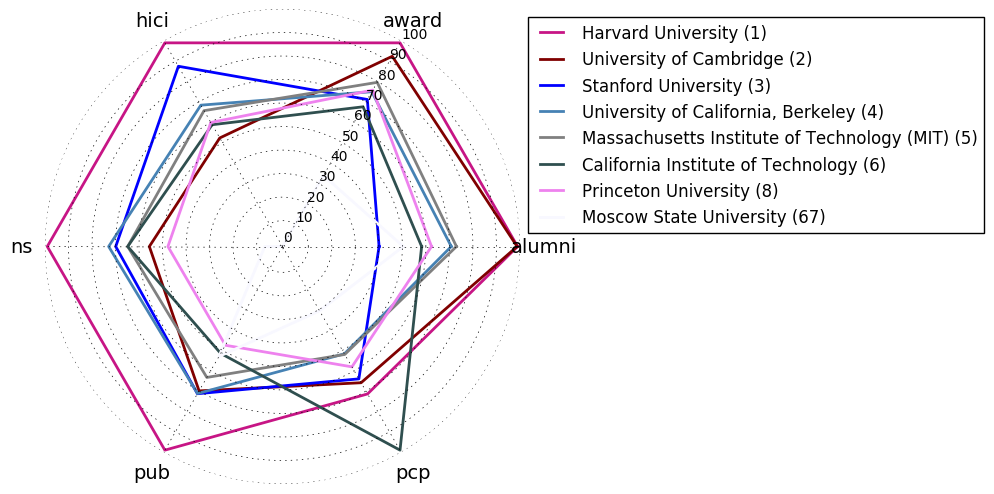

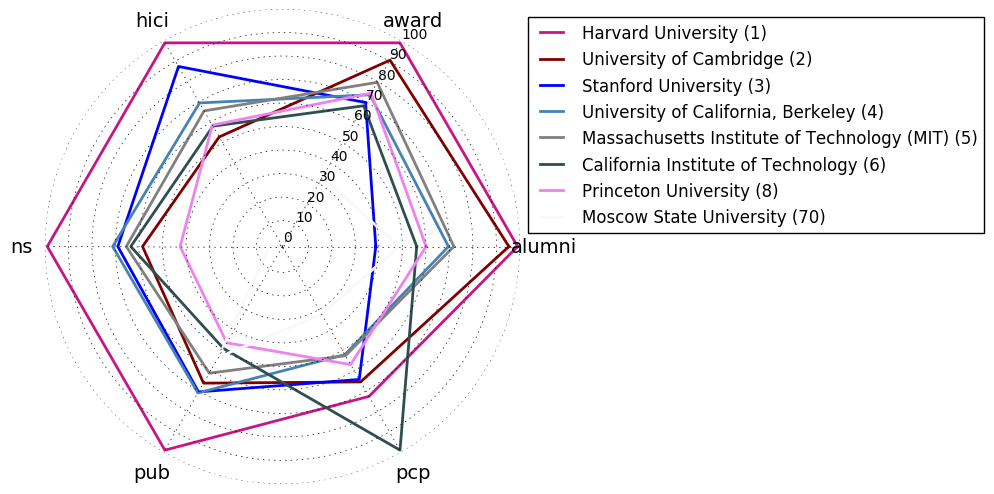

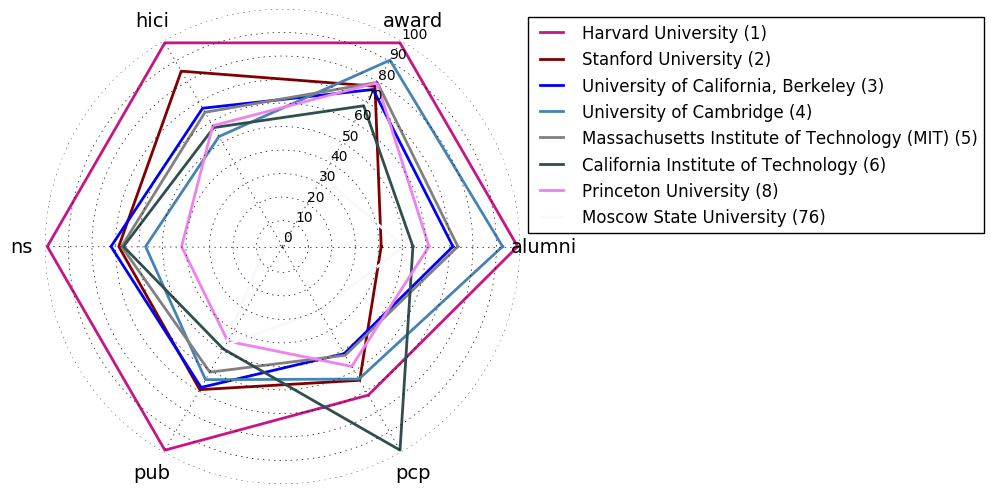

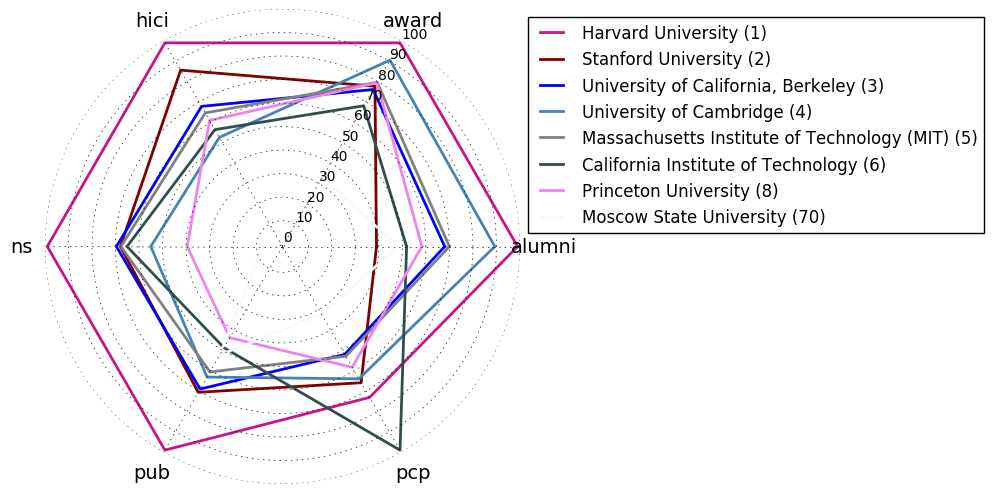

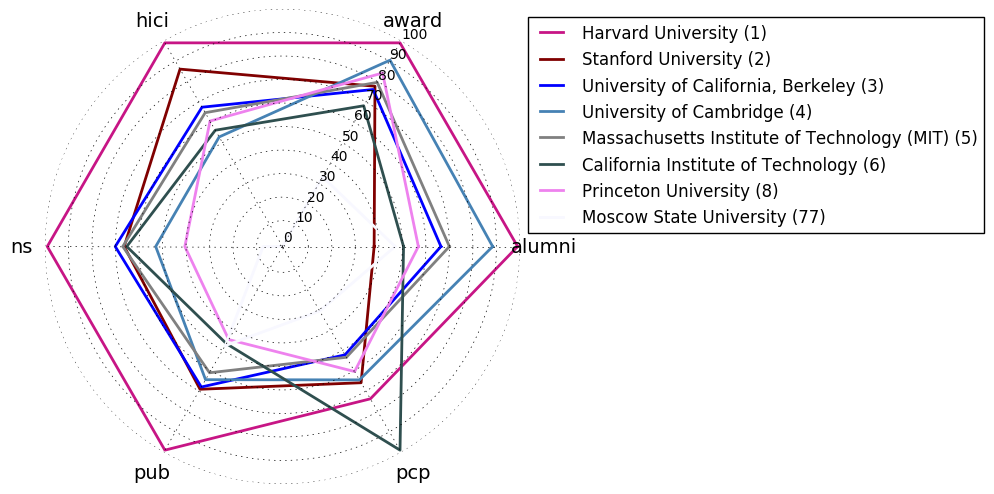

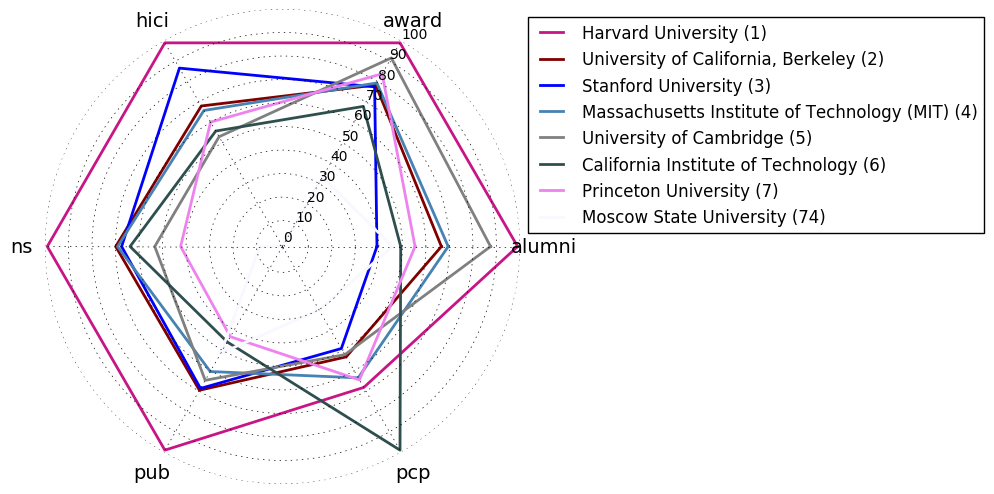

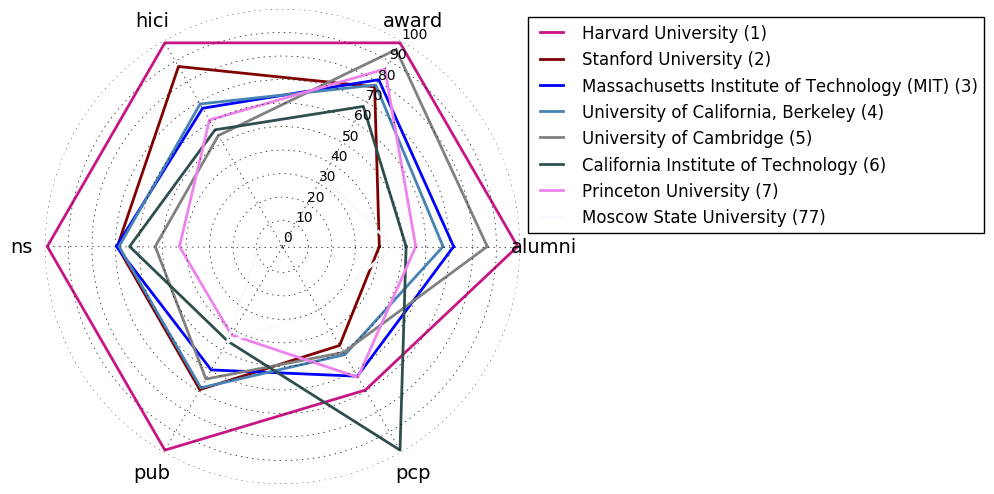

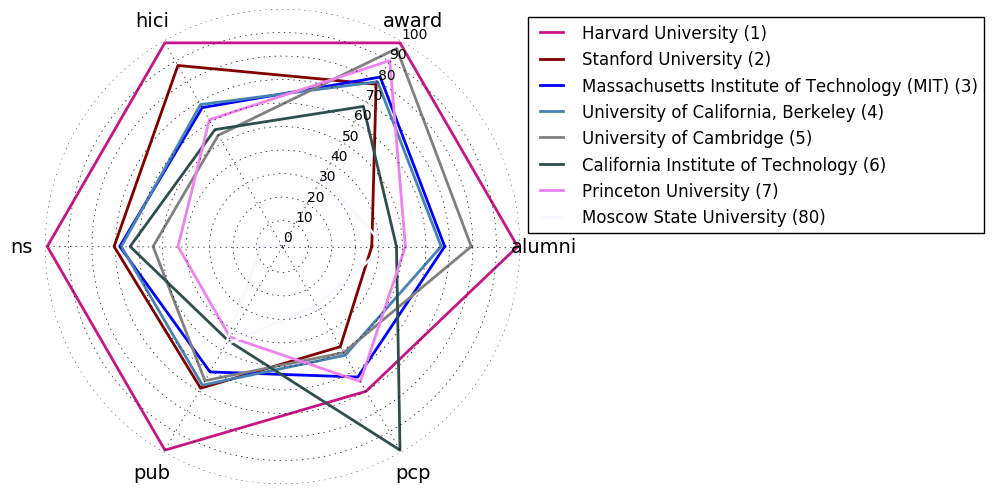

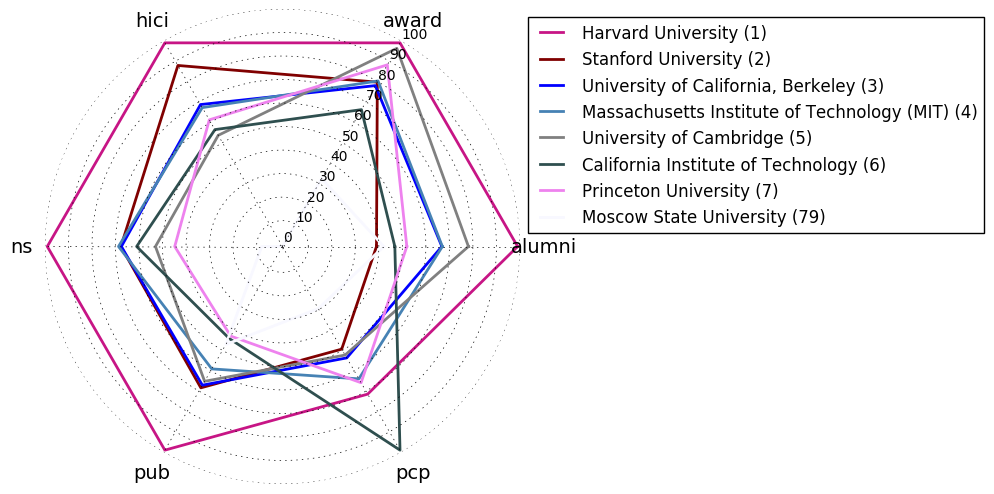

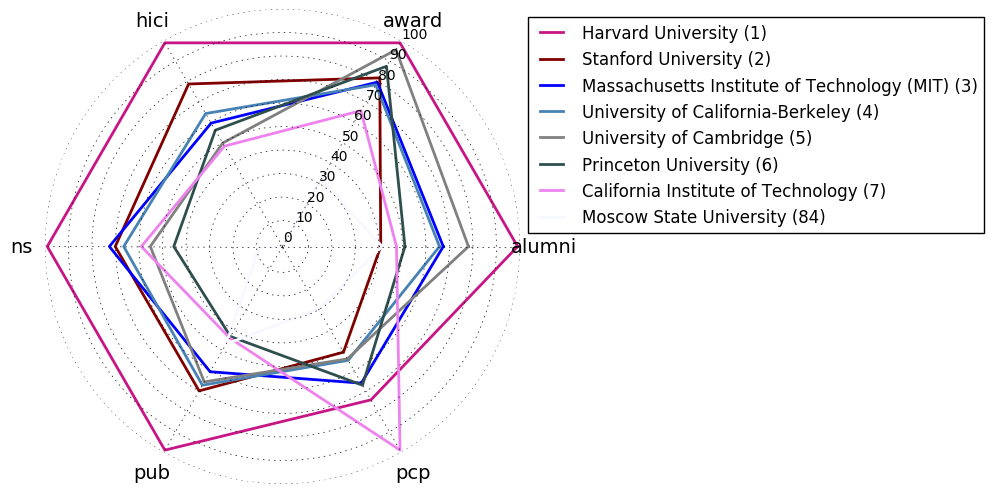

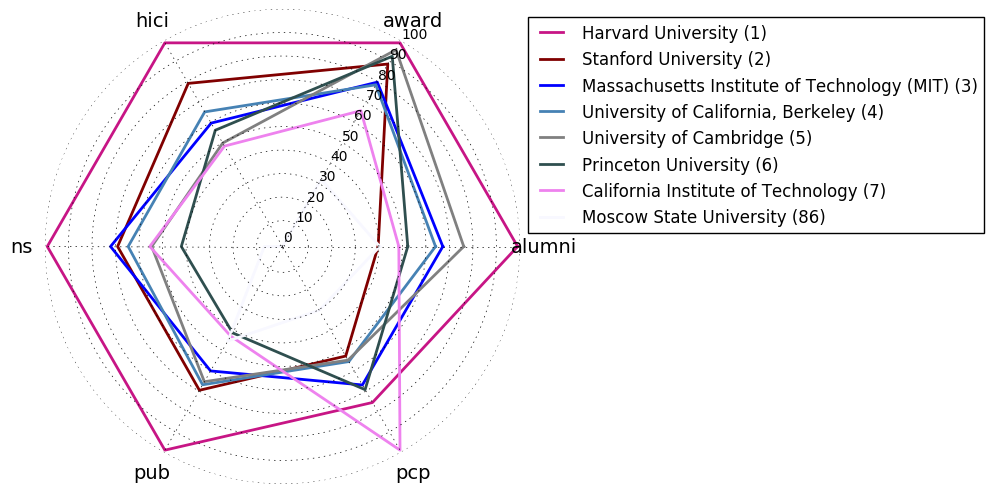

In [37]:
titles = ['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']
labels = ['' if i != 1 else range(0, 101, 10) for i in range(len(title) - 1)]
colors = list(mcol.cnames)[:top7msu[0].shape[0]]

for d in top7msu:
    fig = plt.figure(figsize=(5, 5))
    radar = Radar(fig, titles, labels)
    for i, univ in enumerate(d[d[:, 0].astype(int).argsort()]):
        radar.plot(univ[3:9], lw=2, c=colors[i], alpha=1, label=univ[1] + ' (' + univ[0] + ')')

    radar.ax.legend(bbox_to_anchor=(1, 1), loc=2);
    plt.show()

Lastly, watch at this time series: ranks of the universities from 2005 to 2015. Unfortunately, MSU is losing its positions in the World University Rankings, that can not be said about top 7 universities. They only have little movements.

In [38]:
data_sc = []
for i in range(top7msu.shape[1]):
    data_sc += [go.Scatter(
        x = years,
        y = top7msu[:, i, 0].astype(int),
        name = top7msu[:, i, 1][0],
    )]

layout = go.Layout(
    title = 'World Top Universities Rankings 2005-2015',
    hovermode = 'closest',
    xaxis = dict(
        title = 'year',
    ),
    yaxis = dict(
        title = 'rank',
        autorange='reversed'
    ),
)

iplot(go.Figure(data=data_sc, layout=layout))

## Conclusion

These data are interesting to see, but useless. You can trace your university's rank, compare it with other universities, and that's all. Also these data don't describe the real rank of universities, just give a score from the point of view of science. But these data are designed for these purposes, so we shouldn't search meanings in them. And we shouldn't be upset cause the real knowledge doesn't depend on the rankings.

**Thank you for your attention!**